In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
folder_path = 'C:/Users/SuperWanker/Capstone files' #Folder path for all downloaded CSV Files that contain housing data

#Creates a list of all of the csv files in the Capstone files folder
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read each CSV file into a Dataframe and loads them into a single list
df_list = []
for file in all_files:
    df = pd.read_csv(file)
    df_list.append(df)

# Concatenate all DataFrames into a single one
if df_list: # Check if there are any DataFrames to concatenate
    combined_df = pd.concat(df_list, ignore_index=True)

    # Save the combined DataFrame to a new CSV file
    output_file_path = 'C:/Users/SuperWanker/Capstone files/capstone_combined_data.csv'
    combined_df.to_csv(output_file_path, index=False)
    print(f"All CSV files combined and saved to {output_file_path}")
else:
    print("No CSV files found in the specified folder.")

All CSV files combined and saved to C:/Users/SuperWanker/Capstone files/capstone_combined_data.csv


In [55]:
housingdf = pd.read_csv('C:/Users/SuperWanker/Capstone files/capstone_combined_data.csv', low_memory=False)

In [56]:
housingdf.head()

,RegionID,Type,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/2000,...,1/31/2025,2/28/2025,3/31/2025,4/30/2025,5/31/2025,6/30/2025,7/31/2025,8/31/2025,9/30/2025,City
0,6181,one,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,167051.256778,...,615147.257226,617020.554157,618592.088222,620804.678500,621219.308933,620444.320801,619462.936140,620004.785314,623024.229069,NaN
1,12447,one,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,130019.214289,...,581788.501206,577347.502300,570748.651053,566107.758678,561383.803600,557748.150252,554865.518320,553722.052036,553885.010336,NaN
2,39051,one,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,80466.722490,...,125600.996420,124898.445803,123964.369420,123077.503490,122084.681061,121240.960094,120440.823135,119830.887925,119133.945369,NaN
3,17426,one,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,105709.230664,...,247263.866174,247839.036807,247935.417286,248161.301324,248520.310800,249150.641779,249648.894903,250386.690175,251487.405999,NaN
4,6915,one,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,52423.847379,...,120333.969922,119873.062032,119246.791581,118398.835454,117485.005071,116802.859209,116437.366576,116129.900082,115738.704008,NaN


In [57]:
housingdf = housingdf[housingdf['CountyName'] == 'Maricopa County']

In [58]:
housingdf.head()

,RegionID,Type,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/2000,...,1/31/2025,2/28/2025,3/31/2025,4/30/2025,5/31/2025,6/30/2025,7/31/2025,8/31/2025,9/30/2025,City
6,40326,one,6,Phoenix,city,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",Maricopa County,64691.282216,...,245845.657410,244616.391566,242743.305468,240851.156485,238698.403900,236520.393925,234291.275398,232758.115716,231728.363971,NaN
41,19331,one,41,Mesa,city,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",Maricopa County,55031.700002,...,201673.129538,201096.800170,200017.848757,198547.096288,196868.977668,195420.518339,194271.371999,193612.865233,192833.042542,NaN
87,17384,one,88,Chandler,city,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",Maricopa County,77176.452880,...,253553.278299,252815.679743,251456.728165,249261.560070,246988.768215,245028.265801,243612.191043,242665.393355,241716.461497,NaN
103,18298,one,109,Glendale,city,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",Maricopa County,66738.729593,...,209700.888962,208253.821394,206096.453575,203966.167360,201910.749508,200107.173906,198752.053548,198061.057617,197733.762108,NaN
114,54346,one,120,Scottsdale,city,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",Maricopa County,80614.019317,...,277585.912184,276098.357800,273793.293153,271038.285200,268126.090979,265462.175341,263318.605619,262010.409720,261238.531764,NaN


In [59]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 6 to 163934
Columns: 319 entries, RegionID to City
dtypes: float64(309), int64(2), object(8)
memory usage: 3.9+ MB


In [60]:
housingdf.drop(['SizeRank','StateName','State'],axis=1, inplace=True)

In [61]:
housingdf.head()

,RegionID,Type,RegionName,RegionType,Metro,CountyName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,...,1/31/2025,2/28/2025,3/31/2025,4/30/2025,5/31/2025,6/30/2025,7/31/2025,8/31/2025,9/30/2025,City
6,40326,one,Phoenix,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,64691.282216,64801.398290,64999.372103,65485.813464,...,245845.657410,244616.391566,242743.305468,240851.156485,238698.403900,236520.393925,234291.275398,232758.115716,231728.363971,NaN
41,19331,one,Mesa,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,55031.700002,55115.906857,55187.010735,55407.771949,...,201673.129538,201096.800170,200017.848757,198547.096288,196868.977668,195420.518339,194271.371999,193612.865233,192833.042542,NaN
87,17384,one,Chandler,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,77176.452880,77108.356039,77156.057161,77539.134866,...,253553.278299,252815.679743,251456.728165,249261.560070,246988.768215,245028.265801,243612.191043,242665.393355,241716.461497,NaN
103,18298,one,Glendale,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,66738.729593,67130.605108,67482.147801,68272.309602,...,209700.888962,208253.821394,206096.453575,203966.167360,201910.749508,200107.173906,198752.053548,198061.057617,197733.762108,NaN
114,54346,one,Scottsdale,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,80614.019317,80771.101608,80967.754680,81210.391167,...,277585.912184,276098.357800,273793.293153,271038.285200,268126.090979,265462.175341,263318.605619,262010.409720,261238.531764,NaN


In [62]:
housingdf.drop(['1/31/2000','2/29/2000','3/31/2000','4/30/2000','5/31/2000','6/30/2000','7/31/2000','8/31/2000','9/30/2000','10/31/2000','11/30/2000','12/31/2000'],axis=1,inplace=True)
housingdf.drop(['1/31/2004','2/29/2004','3/31/2004','4/30/2004','5/31/2004','6/30/2004','7/31/2004','8/31/2004','9/30/2004','10/31/2004','11/30/2004','12/31/2004'],axis=1,inplace=True)
housingdf.drop(['1/31/2008','2/29/2008','3/31/2008','4/30/2008','5/31/2008','6/30/2008','7/31/2008','8/31/2008','9/30/2008','10/31/2008','11/30/2008','12/31/2008'],axis=1,inplace=True)
housingdf.drop(['1/31/2012','2/29/2012','3/31/2012','4/30/2012','5/31/2012','6/30/2012','7/31/2012','8/31/2012','9/30/2012','10/31/2012','11/30/2012','12/31/2012'],axis=1,inplace=True)
housingdf.drop(['1/31/2016','2/29/2016','3/31/2016','4/30/2016','5/31/2016','6/30/2016','7/31/2016','8/31/2016','9/30/2016','10/31/2016','11/30/2016','12/31/2016'],axis=1,inplace=True)
housingdf.drop(['1/31/2001','2/28/2001','3/31/2001','4/30/2001','5/31/2001','6/30/2001','7/31/2001','8/31/2001','9/30/2001','10/31/2001','11/30/2001','12/31/2001'],axis=1,inplace=True)
housingdf.drop(['1/31/2002','2/28/2002','3/31/2002','4/30/2002','5/31/2002','6/30/2002','7/31/2002','8/31/2002','9/30/2002','10/31/2002','11/30/2002','12/31/2002'],axis=1,inplace=True)
housingdf.drop(['1/31/2003','2/28/2003','3/31/2003','4/30/2003','5/31/2003','6/30/2003','7/31/2003','8/31/2003','9/30/2003','10/31/2003','11/30/2003','12/31/2003'],axis=1,inplace=True)
housingdf.drop(['1/31/2005','2/28/2005','3/31/2005','4/30/2005','5/31/2005','6/30/2005','7/31/2005','8/31/2005','9/30/2005','10/31/2005','11/30/2005','12/31/2005'],axis=1,inplace=True)
housingdf.drop(['1/31/2006','2/28/2006','3/31/2006','4/30/2006','5/31/2006','6/30/2006','7/31/2006','8/31/2006','9/30/2006','10/31/2006','11/30/2006','12/31/2006'],axis=1,inplace=True)
housingdf.drop(['1/31/2007','2/28/2007','3/31/2007','4/30/2007','5/31/2007','6/30/2007','7/31/2007','8/31/2007','9/30/2007','10/31/2007','11/30/2007','12/31/2007'],axis=1,inplace=True)
housingdf.drop(['1/31/2009','2/28/2009','3/31/2009','4/30/2009','5/31/2009','6/30/2009','7/31/2009','8/31/2009','9/30/2009','10/31/2009','11/30/2009','12/31/2009'],axis=1,inplace=True)
housingdf.drop(['1/31/2010','2/28/2010','3/31/2010','4/30/2010','5/31/2010','6/30/2010','7/31/2010','8/31/2010','9/30/2010','10/31/2010','11/30/2010','12/31/2010'],axis=1,inplace=True)
housingdf.drop(['1/31/2011','2/28/2011','3/31/2011','4/30/2011','5/31/2011','6/30/2011','7/31/2011','8/31/2011','9/30/2011','10/31/2011','11/30/2011','12/31/2011'],axis=1,inplace=True)
housingdf.drop(['1/31/2013','2/28/2013','3/31/2013','4/30/2013','5/31/2013','6/30/2013','7/31/2013','8/31/2013','9/30/2013','10/31/2013','11/30/2013','12/31/2013'],axis=1,inplace=True)
housingdf.drop(['1/31/2014','2/28/2014','3/31/2014','4/30/2014','5/31/2014','6/30/2014','7/31/2014','8/31/2014','9/30/2014','10/31/2014','11/30/2014','12/31/2014'],axis=1,inplace=True)
housingdf.drop(['1/31/2015','2/28/2015','3/31/2015','4/30/2015','5/31/2015','6/30/2015','7/31/2015','8/31/2015','9/30/2015','10/31/2015','11/30/2015','12/31/2015'],axis=1,inplace=True)
housingdf.drop(['1/31/2017','2/28/2017','3/31/2017','4/30/2017','5/31/2017','6/30/2017','7/31/2017','8/31/2017','9/30/2017','10/31/2017','11/30/2017','12/31/2017'],axis=1,inplace=True)
housingdf.drop(['1/31/2018','2/28/2018','3/31/2018','4/30/2018','5/31/2018','6/30/2018','7/31/2018','8/31/2018','9/30/2018','10/31/2018','11/30/2018','12/31/2018'],axis=1,inplace=True)
housingdf.drop(['1/31/2019','2/28/2019','3/31/2019','4/30/2019','5/31/2019','6/30/2019','7/31/2019','8/31/2019','9/30/2019','10/31/2019','11/30/2019','12/31/2019'],axis=1,inplace=True)

In [63]:
housingdf.head()

,RegionID,Type,RegionName,RegionType,Metro,CountyName,1/31/2020,2/29/2020,3/31/2020,4/30/2020,...,1/31/2025,2/28/2025,3/31/2025,4/30/2025,5/31/2025,6/30/2025,7/31/2025,8/31/2025,9/30/2025,City
6,40326,one,Phoenix,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,150730.757857,154043.537989,157929.509458,161137.924762,...,245845.657410,244616.391566,242743.305468,240851.156485,238698.403900,236520.393925,234291.275398,232758.115716,231728.363971,NaN
41,19331,one,Mesa,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,121874.946038,124894.405771,128336.224854,131012.148104,...,201673.129538,201096.800170,200017.848757,198547.096288,196868.977668,195420.518339,194271.371999,193612.865233,192833.042542,NaN
87,17384,one,Chandler,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,160355.437952,163685.982224,167585.427041,170884.762279,...,253553.278299,252815.679743,251456.728165,249261.560070,246988.768215,245028.265801,243612.191043,242665.393355,241716.461497,NaN
103,18298,one,Glendale,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,123597.917521,127488.747346,132065.373054,135978.707992,...,209700.888962,208253.821394,206096.453575,203966.167360,201910.749508,200107.173906,198752.053548,198061.057617,197733.762108,NaN
114,54346,one,Scottsdale,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,172845.396036,176019.605725,180024.798040,183568.239020,...,277585.912184,276098.357800,273793.293153,271038.285200,268126.090979,265462.175341,263318.605619,262010.409720,261238.531764,NaN


In [64]:
housingdf.info

<bound method DataFrame.info of         RegionID   Type  RegionName RegionType                      Metro  \
6          40326    one     Phoenix       city  Phoenix-Mesa-Chandler, AZ   
41         19331    one        Mesa       city  Phoenix-Mesa-Chandler, AZ   
87         17384    one    Chandler       city  Phoenix-Mesa-Chandler, AZ   
103        18298    one    Glendale       city  Phoenix-Mesa-Chandler, AZ   
114        54346    one  Scottsdale       city  Phoenix-Mesa-Chandler, AZ   
...          ...    ...         ...        ...                        ...   
163178     94767  condo       85054        zip  Phoenix-Mesa-Chandler, AZ   
163200     94728  condo       85012        zip  Phoenix-Mesa-Chandler, AZ   
163278     94719  condo       85003        zip  Phoenix-Mesa-Chandler, AZ   
163459     94750  condo       85034        zip  Phoenix-Mesa-Chandler, AZ   
163934     94951  condo       85377        zip  Phoenix-Mesa-Chandler, AZ   

             CountyName      1/31/2020     

In [65]:
missing_data = housingdf[housingdf.isna().any(axis=1)]
print(missing_data)

        RegionID   Type  RegionName RegionType                      Metro  \
6          40326    one     Phoenix       city  Phoenix-Mesa-Chandler, AZ   
41         19331    one        Mesa       city  Phoenix-Mesa-Chandler, AZ   
87         17384    one    Chandler       city  Phoenix-Mesa-Chandler, AZ   
103        18298    one    Glendale       city  Phoenix-Mesa-Chandler, AZ   
114        54346    one  Scottsdale       city  Phoenix-Mesa-Chandler, AZ   
...          ...    ...         ...        ...                        ...   
161012     94888  condo       85306        zip  Phoenix-Mesa-Chandler, AZ   
162861     94854  condo       85262        zip  Phoenix-Mesa-Chandler, AZ   
163078     94952  condo       85378        zip  Phoenix-Mesa-Chandler, AZ   
163459     94750  condo       85034        zip  Phoenix-Mesa-Chandler, AZ   
163934     94951  condo       85377        zip  Phoenix-Mesa-Chandler, AZ   

             CountyName      1/31/2020      2/29/2020      3/31/2020  \
6  

In [66]:
    output_file_path = 'C:/Users/SuperWanker/Capstone files/maricopa_county_data.csv'
    housingdf.to_csv(output_file_path, index=False)
    print(f"All CSV files combined and saved to {output_file_path}")

All CSV files combined and saved to C:/Users/SuperWanker/Capstone files/maricopa_county_data.csv


In [2]:
housingdf = pd.read_csv('C:/Users/SuperWanker/Capstone files/maricopa_county_data.csv')

In [3]:
housingdf.head()

,RegionID,Type,RegionName,RegionType,Metro,CountyName,1/31/2020,2/29/2020,3/31/2020,4/30/2020,...,1/31/2025,2/28/2025,3/31/2025,4/30/2025,5/31/2025,6/30/2025,7/31/2025,8/31/2025,9/30/2025,City
0,40326,one,Phoenix,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,150730.757857,154043.537989,157929.509458,161137.924762,...,245845.657410,244616.391566,242743.305468,240851.156485,238698.403900,236520.393925,234291.275398,232758.115716,231728.363971,Phoenix
1,19331,one,Mesa,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,121874.946038,124894.405771,128336.224854,131012.148104,...,201673.129538,201096.800170,200017.848757,198547.096288,196868.977668,195420.518339,194271.371999,193612.865233,192833.042542,Mesa
2,17384,one,Chandler,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,160355.437952,163685.982224,167585.427041,170884.762279,...,253553.278299,252815.679743,251456.728165,249261.560070,246988.768215,245028.265801,243612.191043,242665.393355,241716.461497,Chandler
3,18298,one,Glendale,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,123597.917521,127488.747346,132065.373054,135978.707992,...,209700.888962,208253.821394,206096.453575,203966.167360,201910.749508,200107.173906,198752.053548,198061.057617,197733.762108,Glendale
4,54346,one,Scottsdale,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,172845.396036,176019.605725,180024.798040,183568.239020,...,277585.912184,276098.357800,273793.293153,271038.285200,268126.090979,265462.175341,263318.605619,262010.409720,261238.531764,Scottsdale


In [70]:
missing_data = housingdf[housingdf.isna().any(axis=1)]
print(missing_data)

      RegionID   Type                        RegionName    RegionType  \
135     417608    two                       Via Sorento  neighborhood   
365     811040  three                       The Meadows  neighborhood   
391     411347  three                        Northgrove  neighborhood   
420     762674  three                     Del Rio Ranch  neighborhood   
473     111413  three                      Apache Wells  neighborhood   
474     822440  three                             Paseo  neighborhood   
572     417626  three                     Holiday Farms  neighborhood   
597     805285  three                      Sierra Tempe  neighborhood   
618     822439  three                  Sands Scottsdale  neighborhood   
622     417784  three                  Fairview Meadows  neighborhood   
624     417847  three                    Sundance Homes  neighborhood   
688     811104  three                    Peoria Estates  neighborhood   
841       7729   four                           Wad

In [72]:
housingdf = housingdf.dropna()
missing_data = housingdf[housingdf.isna().any(axis=1)]
print(missing_data)

Empty DataFrame
Columns: [RegionID, Type, RegionName, RegionType, Metro, CountyName, 1/31/2020, 2/29/2020, 3/31/2020, 4/30/2020, 5/31/2020, 6/30/2020, 7/31/2020, 8/31/2020, 9/30/2020, 10/31/2020, 11/30/2020, 12/31/2020, 1/31/2021, 2/28/2021, 3/31/2021, 4/30/2021, 5/31/2021, 6/30/2021, 7/31/2021, 8/31/2021, 9/30/2021, 10/31/2021, 11/30/2021, 12/31/2021, 1/31/2022, 2/28/2022, 3/31/2022, 4/30/2022, 5/31/2022, 6/30/2022, 7/31/2022, 8/31/2022, 9/30/2022, 10/31/2022, 11/30/2022, 12/31/2022, 1/31/2023, 2/28/2023, 3/31/2023, 4/30/2023, 5/31/2023, 6/30/2023, 7/31/2023, 8/31/2023, 9/30/2023, 10/31/2023, 11/30/2023, 12/31/2023, 1/31/2024, 2/29/2024, 3/31/2024, 4/30/2024, 5/31/2024, 6/30/2024, 7/31/2024, 8/31/2024, 9/30/2024, 10/31/2024, 11/30/2024, 12/31/2024, 1/31/2025, 2/28/2025, 3/31/2025, 4/30/2025, 5/31/2025, 6/30/2025, 7/31/2025, 8/31/2025, 9/30/2025, City]
Index: []

[0 rows x 76 columns]


In [4]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1610 non-null   int64  
 1   Type        1610 non-null   object 
 2   RegionName  1610 non-null   object 
 3   RegionType  1610 non-null   object 
 4   Metro       1610 non-null   object 
 5   CountyName  1610 non-null   object 
 6   1/31/2020   1569 non-null   float64
 7   2/29/2020   1567 non-null   float64
 8   3/31/2020   1567 non-null   float64
 9   4/30/2020   1569 non-null   float64
 10  5/31/2020   1569 non-null   float64
 11  6/30/2020   1569 non-null   float64
 12  7/31/2020   1569 non-null   float64
 13  8/31/2020   1564 non-null   float64
 14  9/30/2020   1567 non-null   float64
 15  10/31/2020  1567 non-null   float64
 16  11/30/2020  1567 non-null   float64
 17  12/31/2020  1569 non-null   float64
 18  1/31/2021   1569 non-null   float64
 19  2/28/2021   1572 non-null  

In [5]:
housingdf.drop(['Metro','CountyName'],axis=1,inplace=True)

In [6]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 74 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1610 non-null   int64  
 1   Type        1610 non-null   object 
 2   RegionName  1610 non-null   object 
 3   RegionType  1610 non-null   object 
 4   1/31/2020   1569 non-null   float64
 5   2/29/2020   1567 non-null   float64
 6   3/31/2020   1567 non-null   float64
 7   4/30/2020   1569 non-null   float64
 8   5/31/2020   1569 non-null   float64
 9   6/30/2020   1569 non-null   float64
 10  7/31/2020   1569 non-null   float64
 11  8/31/2020   1564 non-null   float64
 12  9/30/2020   1567 non-null   float64
 13  10/31/2020  1567 non-null   float64
 14  11/30/2020  1567 non-null   float64
 15  12/31/2020  1569 non-null   float64
 16  1/31/2021   1569 non-null   float64
 17  2/28/2021   1572 non-null   float64
 18  3/31/2021   1572 non-null   float64
 19  4/30/2021   1572 non-null  

In [77]:
housingdf.info

<bound method DataFrame.info of       RegionID   Type  RegionName RegionType      1/31/2020      2/29/2020  \
0        40326    one     Phoenix       city  150730.757857  154043.537989   
1        19331    one        Mesa       city  121874.946038  124894.405771   
2        17384    one    Chandler       city  160355.437952  163685.982224   
3        18298    one    Glendale       city  123597.917521  127488.747346   
4        54346    one  Scottsdale       city  172845.396036  176019.605725   
...        ...    ...         ...        ...            ...            ...   
1602     94854  condo       85262        zip  577191.282137  577191.282137   
1604     94720  condo       85004        zip  288060.178873  292075.282606   
1605     94767  condo       85054        zip  320294.184529  322648.492624   
1606     94728  condo       85012        zip  189139.232700  191952.614460   
1607     94719  condo       85003        zip  324758.894400  329215.369629   

          3/31/2020      4/30/2

In [4]:
housingdf= pd.read_csv('C:/Users/SuperWanker/Capstone files/maricopa_county_data_zipcode_extend.csv')

In [5]:
housingdf.head()

,RegionID,City,Type,RegionName,Zip,RegionType,Metro,CountyName,1/31/2020,2/29/2020,...,12/31/2024,1/31/2025,2/28/2025,3/31/2025,4/30/2025,5/31/2025,6/30/2025,7/31/2025,8/31/2025,9/30/2025
0,40326,Phoenix,one,Phoenix,NaN,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,150730.757857,154043.537989,...,246868.574529,245845.657410,244616.391566,242743.305468,240851.156485,238698.403900,236520.393925,234291.275398,232758.115716,231728.363971
1,19331,Mesa,one,Mesa,NaN,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,121874.946038,124894.405771,...,202095.612903,201673.129538,201096.800170,200017.848757,198547.096288,196868.977668,195420.518339,194271.371999,193612.865233,192833.042542
2,17384,Chandler,one,Chandler,NaN,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,160355.437952,163685.982224,...,253989.691589,253553.278299,252815.679743,251456.728165,249261.560070,246988.768215,245028.265801,243612.191043,242665.393355,241716.461497
3,18298,Glendale,one,Glendale,NaN,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,123597.917521,127488.747346,...,210502.863893,209700.888962,208253.821394,206096.453575,203966.167360,201910.749508,200107.173906,198752.053548,198061.057617,197733.762108
4,54346,Scottsdale,one,Scottsdale,NaN,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,172845.396036,176019.605725,...,278719.572602,277585.912184,276098.357800,273793.293153,271038.285200,268126.090979,265462.175341,263318.605619,262010.409720,261238.531764


In [6]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1610 non-null   int64  
 1   City        1610 non-null   object 
 2   Type        1610 non-null   object 
 3   RegionName  1610 non-null   object 
 4   Zip         1474 non-null   float64
 5   RegionType  1610 non-null   object 
 6   Metro       1610 non-null   object 
 7   CountyName  1610 non-null   object 
 8   1/31/2020   1569 non-null   float64
 9   2/29/2020   1567 non-null   float64
 10  3/31/2020   1567 non-null   float64
 11  4/30/2020   1569 non-null   float64
 12  5/31/2020   1569 non-null   float64
 13  6/30/2020   1569 non-null   float64
 14  7/31/2020   1569 non-null   float64
 15  8/31/2020   1564 non-null   float64
 16  9/30/2020   1567 non-null   float64
 17  10/31/2020  1567 non-null   float64
 18  11/30/2020  1567 non-null   float64
 19  12/31/2020  1569 non-null  

In [7]:
housingdf = housingdf.dropna()

In [8]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426 entries, 11 to 1607
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1426 non-null   int64  
 1   City        1426 non-null   object 
 2   Type        1426 non-null   object 
 3   RegionName  1426 non-null   object 
 4   Zip         1426 non-null   float64
 5   RegionType  1426 non-null   object 
 6   Metro       1426 non-null   object 
 7   CountyName  1426 non-null   object 
 8   1/31/2020   1426 non-null   float64
 9   2/29/2020   1426 non-null   float64
 10  3/31/2020   1426 non-null   float64
 11  4/30/2020   1426 non-null   float64
 12  5/31/2020   1426 non-null   float64
 13  6/30/2020   1426 non-null   float64
 14  7/31/2020   1426 non-null   float64
 15  8/31/2020   1426 non-null   float64
 16  9/30/2020   1426 non-null   float64
 17  10/31/2020  1426 non-null   float64
 18  11/30/2020  1426 non-null   float64
 19  12/31/2020  1426 non-null   flo

In [9]:
housingdf.drop(['Metro','CountyName'],axis=1, inplace=True)

In [10]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426 entries, 11 to 1607
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1426 non-null   int64  
 1   City        1426 non-null   object 
 2   Type        1426 non-null   object 
 3   RegionName  1426 non-null   object 
 4   Zip         1426 non-null   float64
 5   RegionType  1426 non-null   object 
 6   1/31/2020   1426 non-null   float64
 7   2/29/2020   1426 non-null   float64
 8   3/31/2020   1426 non-null   float64
 9   4/30/2020   1426 non-null   float64
 10  5/31/2020   1426 non-null   float64
 11  6/30/2020   1426 non-null   float64
 12  7/31/2020   1426 non-null   float64
 13  8/31/2020   1426 non-null   float64
 14  9/30/2020   1426 non-null   float64
 15  10/31/2020  1426 non-null   float64
 16  11/30/2020  1426 non-null   float64
 17  12/31/2020  1426 non-null   float64
 18  1/31/2021   1426 non-null   float64
 19  2/28/2021   1426 non-null   flo

In [11]:
housingdf.drop(['RegionType'],axis=1, inplace=True)

In [12]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426 entries, 11 to 1607
Data columns (total 74 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1426 non-null   int64  
 1   City        1426 non-null   object 
 2   Type        1426 non-null   object 
 3   RegionName  1426 non-null   object 
 4   Zip         1426 non-null   float64
 5   1/31/2020   1426 non-null   float64
 6   2/29/2020   1426 non-null   float64
 7   3/31/2020   1426 non-null   float64
 8   4/30/2020   1426 non-null   float64
 9   5/31/2020   1426 non-null   float64
 10  6/30/2020   1426 non-null   float64
 11  7/31/2020   1426 non-null   float64
 12  8/31/2020   1426 non-null   float64
 13  9/30/2020   1426 non-null   float64
 14  10/31/2020  1426 non-null   float64
 15  11/30/2020  1426 non-null   float64
 16  12/31/2020  1426 non-null   float64
 17  1/31/2021   1426 non-null   float64
 18  2/28/2021   1426 non-null   float64
 19  3/31/2021   1426 non-null   flo

In [13]:
print(housingdf['City'].unique())

['Peoria' 'Gilbert' 'Phoenix' 'Glendale' 'Tempe' 'Mesa' 'Chandler'
 'Scottsdale' 'Surprise' 'Sun City' 'Sun City West' 'Queen Creek'
 'Buckeye' 'Goodyear' 'Avondale' 'Tolleson' 'Anthem' 'Litchfield Park'
 'El Mirage' 'Cave Creek' 'Fountain Hills' 'Paradise Valley' 'Wickenburg'
 'Youngtown' 'Rio Verde' 'Carefree' 'Waddell' 'New River' 'Wittmann'
 'Tonopah' 'Morristown']


In [14]:
housingdf['City'] = housingdf['City'].replace({'Peoria':1,'Gilbert':2,'Tempe':3,'Mesa':4,'Chandler':5,'Scottsdale':6,'Glendale':7,'Avondale':8,'Sun City':9,'Phoenix':10})

In [15]:
housingdf['City'].unique()

array([1, 2, 10, 7, 3, 4, 5, 6, 'Surprise', 9, 'Sun City West',
       'Queen Creek', 'Buckeye', 'Goodyear', 8, 'Tolleson', 'Anthem',
       'Litchfield Park', 'El Mirage', 'Cave Creek', 'Fountain Hills',
       'Paradise Valley', 'Wickenburg', 'Youngtown', 'Rio Verde',
       'Carefree', 'Waddell', 'New River', 'Wittmann', 'Tonopah',
       'Morristown'], dtype=object)

In [16]:
print(housingdf['Type'].unique())

['three' 'four' 'five' 'one' 'two' 'condo']


In [17]:
housingdf['Type'] = housingdf['Type'].replace({'one':1,'two':2,'three':3,'four':4,'five':5,'condo':6})
print(housingdf['Type'].unique())

[3 4 5 1 2 6]


C:\Users\SuperWanker\AppData\Local\Temp\ipykernel_29704\2160013927.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housingdf['Type'] = housingdf['Type'].replace({'one':1,'two':2,'three':3,'four':4,'five':5,'condo':6})


In [18]:
print(housingdf['RegionName'].unique())

['83rd Ave & Thunderbird' 'Adora Trails' 'Agritopia' 'Ahwatukee Foothills'
 '85032' '85301' '85008' '85282' '85022' '85201' '85224' '85281' '85254'
 '85015' '85255' '85209' '85374' '85210' '85251' '85027' '85260' '85018'
 '85206' '85016' '85048' '85020' '85351' '85375' '85014' '85006' '85258'
 '85013' '85250' '85004' '85012' '85003' 'Alegre Community' 'Alhambra'
 'Allen Ranch' 'Alta Mesa' 'Alta Mira' 'Alta Vista Estates'
 'Amberwood North' 'Ancala' 'Andersen Springs' 'Apache Wells' 'Arbor Walk'
 'Arden Park' 'Arizona Pinecrest' 'Arizona Reflections' 'Arizona Skyline'
 'Arrowhead Lakes' 'Arrowhead Meadows' 'Arrowhead Ranch'
 'Arrowhead Shores' 'Artemina' 'Ashland Ranch' 'Ashley Heights'
 'Ashley Park' 'Augusta Ranch' 'Autumn Ridge' 'Balboa Way' 'Bell'
 'Bell Park' 'Bella Vista' 'Bellasera' 'Bethany Heights' 'Boardwalk'
 'Boulder Creek' 'Boulder Mountain' '85142' '85225' '85326' '85204'
 '85383' '85308' '85041' '85345' '85033' '85338' '85035' '85009' '85234'
 '85339' '85037' '85207' '853

In [19]:
housingdf['RegionName'] = housingdf['RegionName'].replace({'83rd Ave & Thunderbird':1, 'Adora Trails':2, 'Agritopia':3, 'Ahwatukee Foothills':4,
 'Alegre Community':5, 'Alhambra':6, 'Allen Ranch':7, 'Alta Mesa':8, 'Alta Mira':9,
 'Alta Vista Estates':10, 'Amberwood North':11, 'Ancala':12, 'Andersen Springs':13,
 'Apache Wells':14, 'Arbor Walk':15, 'Arden Park':16, 'Arizona Pinecrest':17,
 'Arizona Reflections':18, 'Arizona Skyline':19, 'Arrowhead Lakes':20,
 'Arrowhead Meadows':21, 'Arrowhead Ranch':22, 'Arrowhead Shores':23, 'Artemina':24,
 'Ashland Ranch':25, 'Ashley Heights':26, 'Ashley Park':27, 'Augusta Ranch':28,
 'Autumn Ridge':29, 'Balboa Way':30, 'Bell':31, 'Bell Park':32, 'Bella Vista':33, 'Bellasera':34,
 'Bethany Heights':35, 'Boardwalk':36, 'Boulder Creek':37, 'Boulder Mountain':38,
 'Braemar':39, 'Breckenridge Manor':40, 'Bridges at Gilbert':41, 'Bridlewood':42,
 'Broadmor':43, 'Brookside Village':44, 'Buckhorn':45, 'Buenavante':46, 'C.A.N.D.O.':47,
 'Cambridge Estates':48, 'Camelback East':49, 'Camelback Park':50, 'Camelot Estates':51,
 'Camelot Village':52, 'Cameron Ranch':53, 'Camino A Lago':54, 'Canyon Oaks Estates':55,
 'Carino Estates':56, 'Carol Rae Ranch':57, 'Carriage Lane':58, 'Carrizal':59,
 'Casa de Sol':60, 'Casa Del Rey':61, 'Casa Mesa II':62, 'Casa Mia':63, 'Cashion':64,
 'Cavalier Vista':65, 'Cayman Square':66, 'Central City':67, 'Chandler Crossing':68,
 'Chaparral Estates':69, 'Chaparral Ranch':70, 'Chapparal Country Estates':71,
 'Cibola Vista':72, 'Circle G Meadows':73, 'Circle G Riggs Ranch':74, 'Citrus':75,
 'Clark Park':76, 'Clearview Manor':77, 'Cobblefield':78, 'Cobblestone':79,
 'Coldwater Ridge':80, 'Coldwater Springs':81, 'Cole Park':82, 'Colonia Coronita':83,
 'Community Fiesta':84, 'Continental Terrace':85, 'Continental Townhouses':86,
 'Cooley Station':87, 'Cooley Station North':88, 'Cooper Commons':89, 'Cooper Corners':90,
 'Cooper Ranch':91, 'Copper Ranch':92, 'Corona Village':93, 'Coronado Ranch':94,
 'Corte Sierra':95, 'Cottage Grove Estates':96, 'Cottonwoods Crossing':97,
 'Country Hollow':98, 'Country Meadows':99, 'Country Place':100, 'Country Shadows':101,
 'Countrybrook Meadows':102, 'Countryside Estates':103, 'Cox Heights':104,
 'Crescent Village':105, 'Crimson Creek':106, 'Crimson Crossing':107,
 'Crossings at Crossroads':108, 'Crystal Garden':109, 'Crystal Point':110, 'CW Ranch':111,
 'Dava-Lakeshore':112, 'Dave Brown West':113, 'Dawn':114, 'DC Ranch':115, 'Deer Creek':116,
 'Deer Valley':117, 'Deer Village':118, 'Del Rio Ranch':119, 'Desert Harbor':120,
 'Desert Harmony':121, 'Desert Highlands':122, 'Desert Uplands':123, 'Desert View':124,
 'Dobson Place':125, 'Dobson Ranch':126, 'Dobson Woods':127, 'Dove Valley Ranch':128,
 'Driftwood Ranch':129, 'Eagle Pass':130, 'Eastridge':131, 'El Dorado at the Highlands':132,
 'El Dorado Lakes':133, 'Encanto':134, 'Escalante':135, 'Estancia':136,
 'Estate Groves and Valencia Estates':137, 'Estate La Colina':138,
 'Estates at Specturm' 'Estrella':139, 'Evergreen' 'Fairmont View':140,
 'Farmhouse Meadows':141, 'Festiva Court':142, 'Fieldcrest':143, 'Fiesta Park Village':144,
 'Fincher Farms':145, 'Finley Farms':146, 'Fletcher Heights':147, 'Fountain of the Sun':148,
 'Fox Crossing':149, 'Foxfire':150, 'Freeman Farms':151, 'Fulton Ranch':152, 'Gainey Ranch':153,
 'Galveston':154, 'Garden Lakes':155, 'Garden Point':156, 'Gateway Village':157,
 'Gilbert Ranch':158, 'Gililland':159, 'Glenhurst':160, 'Golden Hills':161, 'Golden Palms':162,
 'Granite Run':163, 'Grayhawk':164, 'Greater Corona Village':165, 'Greenfield Lakes':166,
 'Greenwood Glen':167, 'Harbor Shores':168, 'Hartford Village':169, 'Hearthstone':170,
 'Heather Place':171, 'Heritage Park':172, 'Hidden Manor':173,
 'Highland Groves At Morrison Ranch':174, 'Higley Groves':175, 'Higley Park':176,
 'Hilcrest Ranch':177, 'Historic Avondale':178, 'Hohokam Village':179, 'Holdeman':180,
 'Holiday Farms':181, 'Hollis Park':182, 'Hughes Acres':183, 'Hy-View':184,
 'Independence Heights':185, 'Indian Bend':186, 'Ironwood Village':187,
 'Kempton Crossing':188, 'Kerby Estates':189, 'Kiwanis Park':190, 'Knoell East':191,
 'La Aldea':192, 'La Buena Vida':193, 'Lago Estancia':194, 'Lagos Vistoso':195,
 'Lakeview Trails':196, 'Lamoreaux Farms':197, 'Lantana Ranch':198, 'Las Brisas Pointe':199,
 'Las Palmeras West':200, 'Las Sendas':201, 'Laveen':202, 'Layton Lakes':203, 'Legend Trail':204,
 'Leisure World':205, 'Lesueur Estates':206, 'Lexington Place':207, 'Lindsay Ranch':208,
 "Lyon's Gate":209, 'Madera Parc':210, 'Manistee Ranch':211, 'Marbella Vineyards':212,
 'Marilyn Ann':213, 'Marlborough Mesa':214, 'Marlborough Park':215, 'Marshall Ranch':216,
 'Maryvale':217, 'McClintock':218, 'McDowell Mountain Ranch':219, 'Meridian Hills':220,
 'Meridian Pointe':221, 'Mesa Grande':222, 'Meyer Park':223, 'Millet Ranch':224, 'Mira Mesa':225,
 'Mirabel Village':226, 'Mirador Estates':227, 'Mission Valley':228, 'Montara Park':229,
 'Monte Vista':230, 'Monterey Point':231, 'Monterey Vista':232, 'Moondance':233,
 'Mountain Ranch':234, 'Mountain View':235, 'Neely Commons':236, 'Neely Farms':237,
 'Neely Ranch':238, 'New River':239, 'New River Shores':240, 'North Gateway':241,
 'North Mountain':242, 'North Shore':243, 'Northgrove':244, 'Northpointe':245, 'Oakhollow':246,
 'Oasis at Anozira':247, 'Ocotillo':248, 'Ocotillo Lakes':249, 'Ocotillo Rose':250,
 'Old Stone Ranch':251, 'Olive Green Villas':252, "O'Neil Ranch":253, 'Optimist Park NE':254,
 'Optimist Park NW':255, 'Optimist Park SE':256, 'Optimist Park SW':257, 'Orange Tree':258,
 'Orangewood Estates':259, 'Papago Park View':260, 'Paradise Park':261, 'Paradise Valley':262,
 'Park of the Canals':263, 'Park Promenade':264, 'Park Scottsdale':265, 'Park Village':266,
 'Parkridge' 'Parkview':267, 'Parkwood Ranch':268, 'Paseo Crossings':269,
 'Paseo Trail North':270, 'Pecos Aldea':271, 'Pecos Manor':272, 'Pecos Park':273,
 'Pecos Ranch':274, 'Peoria Ave':275, 'Peppermill Run':276, 'Pepperwood':277, 'Peterson Park':278,
 'Pinnacle Peak Heights':279, 'Pioneer':280, 'Pleasant Valley':281, 'Powell Estates':282,
 'Power Ranch':283, 'Rancho Cimarron':284, 'Rancho Corona':285, 'Rancho del Mar':286,
 'Rancho Del Ray':287, 'Rancho Del Verde':288, 'Rancho Santa Fe':289, 'Ray Manor':290,
 'Ray Ranch':291, 'Red Mountain Ranch':292, 'Redwood Estates-Markwood South':293,
 'Reed Park':294, 'Ridgeview':295, 'Riggs Ranch Meadows':296, 'Riverside':297, 'Rock Springs':298,
 'Roosevelt Park':299, 'Roundtree Ranch':300, 'Rovey Farm Estates':301, 'Royal Palms':302,
 'Rural-Geneva':303, 'Sage Creek':304, 'Saguaro Canyon':305, 'Sahuaro Park West':306,
 'San Marcos':307, 'San Michelle':308, 'San Tan Ranch':309, 'San Vincente':310, 'Sandahl':311,
 'Sands Oasis':312, 'Santa Rita Ranch':313, 'Scottsdale Highlands':314,
 'Scottsdale Mountain':315, 'Scottsdale Ranch':316, 'Secluded Acres':317,
 "Settler's Meadow":318, "Settler's Point South":319, 'Seville':320, 'Shadow Ridge':321,
 'Shamrock Estates':322, 'Sherwood':323, 'Sherwood Manor':324, 'Sienna':325, 'Sierra Ranch':326,
 'Sierra Tempe':327, 'Signal Butte Manor':328, 'Signal Butte Ranch':329, 'Silverhawke':330,
 'Silverton':331, 'Silverton Ranch':332, 'Sonoma Ranch':333, 'Sonoran Hills':334,
 'Sonoran Mountain Ranch':335, 'Sonoran Vista':336, 'South Mountain':337,
 'Southern Palms':338, 'Southmoore':339, 'Southwest Shawnee Park':340,
 'Southwest Village':341, 'Spectrum':342, 'Springer Ranch':343, 'Springfield':344,
 'Springfield Lakes':345, 'Springs':346, 'Stonebridge Lakes':347, 'Stonecreek':348,
 'Stonecrest':349, 'Stonegate':350, 'Stonegate Crossing':351, 'Stonegate Estates':352,
 'Stratland Estates':353, 'Summer Place Village':354, 'Summerset':355,
 'Summerset Village':356, 'Summit':357, 'Sun Air Estates':358, 'Sun Groves':359, 'Sun Lakes':360,
 'Sun River':361, 'Sun View':362, 'Sunbird':363, 'Suncliff':364, 'Sundown Ranch':365,
 'Sunland Springs Village':366, 'Sunland Village':367, 'Sunland Village East':368,
 'Sunridge':369, 'Sunset':370, 'Sunset Village':371, 'Suntown':372, 'Sunwest Trails':373,
 'Superstition Springs':374, 'Sweetwater':375, 'Sweetwater Estates':376,
 'Sweetwater Heights':378, 'Sweetwater Ridge':379, 'Symphony Estates':380,
 'Tarrington Place':381, 'Tempe Gardens':382, 'Tempe Royal Estates':383,
 'Tempe South Mountain':384, 'Terramar':385, 'The Crossroads':386, 'The Gardens':387,
 'The Groves':388, 'The Islands':389, 'The Lakes':390, 'The Meadows':391, 'The Provinces':392,
 'The Traditions':393, 'The Wells':394, 'Thunderbird Palms':395, 'Thunderbird Park':396,
 'Tiburon':397, 'Tierra Del Rio':398, 'Tone':399, 'Towne Meadows':400, 'Trails at Scottsdale':401,
 'Travata':402, 'Tres Rios Landing':403, 'Trilogy':404, 'Troon':405, 'Troon North':406,
 'Twelve Oaks':407, 'United Amigos':408, 'University Heights':409, 'University Hills':410,
 'Upland Park':411, 'Val Vista Classic':412, 'Val Vista Lakes':413, 'Val Vista Meadows':414,
 'Val Vista Park':415, 'Val Vista Place':416, 'Ventana Lakes':417, 'Via De Cielo':418,
 'Villa Monterey':419, 'Village Grove':420, 'Villages of Eastridge':421,
 'Villagio at Tempe':422, 'Vincenz':423, 'Vineyards':424, 'Vintage Ranch':425, 'Vista del Oro':426,
 'Vista Dorada':427, 'Warner Ranch':428, 'West Glen':429, 'West Plaza Estates':430,
 'Westbrook Village':431, 'Western Skies':432, 'Westgreen Estates':433, 'Westwind':434,
 'Westwing Mountain':435, 'Wild Tree':436, 'Willis Ranch':437, 'Willows':438, 'Wind Drift':439,
 'Windgate Ranch':440, 'Windmills West':441, 'Windscape':442, 'Winfield':443, 'Wood Park':444,
 'Woodglen':445})

In [17]:
print(housingdf['RegionName'].unique())

[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 'Estates at Specturm' 'Estrella' 'Evergreen' 'Fairmont View'
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 2

In [18]:
housingdf['RegionName'] = housingdf['RegionName'].replace({'Estates at Specturm':446,'Estrella':447, 'Evergreen':448,'Fairmont View':449,'Parkridge':450,'Parkview':451})

C:\Users\SuperWanker\AppData\Local\Temp\ipykernel_25360\3438235021.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housingdf['RegionName'] = housingdf['RegionName'].replace({'Estates at Specturm':446,'Estrella':447, 'Evergreen':448,'Fairmont View':449,'Parkridge':450,'Parkview':451})


In [19]:
print(housingdf['RegionName'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 446 447 448 449 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 24

In [88]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
X=housingdf[['Type','City']]
y=housingdf['9/30/2025']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=114)

In [139]:
from sklearn.model_selection import RepeatedKFold
from numpy import arange
housingModel = LassoCV(cv=4, random_state=114)
housingModel.fit(X_train, y_train)

LassoCV(cv=4, random_state=114)

In [140]:
print(housingModel.alpha_)

2748.633112537874


In [141]:
y_pred = housingModel.predict(X_test)

In [142]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE is : {mse}")
print(f"R2 score is : {r2}")

MSE is : 54405885724.71143
R2 score is : 0.14811413109747706


In [143]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
y_linear_pred= linearModel.predict(X_test)
mse = mean_squared_error(y_test,y_linear_pred)
r2 = r2_score(y_test, y_linear_pred)
print(f"MSE is : {mse}")
print(f"R2 score is : {r2}")

MSE is : 54546965093.49293
R2 score is : 0.14590511420421748


In [377]:
housingdf= pd.read_csv('C:/Users/SuperWanker/Capstone files/maricopa_county_data_zipcode_extend.csv')

In [378]:
housingdf.head()

,RegionID,City,Type,RegionName,Zip,RegionType,Metro,CountyName,1/31/2020,2/29/2020,...,12/31/2024,1/31/2025,2/28/2025,3/31/2025,4/30/2025,5/31/2025,6/30/2025,7/31/2025,8/31/2025,9/30/2025
0,40326,Phoenix,one,Phoenix,NaN,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,150730.757857,154043.537989,...,246868.574529,245845.657410,244616.391566,242743.305468,240851.156485,238698.403900,236520.393925,234291.275398,232758.115716,231728.363971
1,19331,Mesa,one,Mesa,NaN,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,121874.946038,124894.405771,...,202095.612903,201673.129538,201096.800170,200017.848757,198547.096288,196868.977668,195420.518339,194271.371999,193612.865233,192833.042542
2,17384,Chandler,one,Chandler,NaN,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,160355.437952,163685.982224,...,253989.691589,253553.278299,252815.679743,251456.728165,249261.560070,246988.768215,245028.265801,243612.191043,242665.393355,241716.461497
3,18298,Glendale,one,Glendale,NaN,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,123597.917521,127488.747346,...,210502.863893,209700.888962,208253.821394,206096.453575,203966.167360,201910.749508,200107.173906,198752.053548,198061.057617,197733.762108
4,54346,Scottsdale,one,Scottsdale,NaN,city,"Phoenix-Mesa-Chandler, AZ",Maricopa County,172845.396036,176019.605725,...,278719.572602,277585.912184,276098.357800,273793.293153,271038.285200,268126.090979,265462.175341,263318.605619,262010.409720,261238.531764


In [379]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1610 non-null   int64  
 1   City        1610 non-null   object 
 2   Type        1610 non-null   object 
 3   RegionName  1610 non-null   object 
 4   Zip         1474 non-null   float64
 5   RegionType  1610 non-null   object 
 6   Metro       1610 non-null   object 
 7   CountyName  1610 non-null   object 
 8   1/31/2020   1569 non-null   float64
 9   2/29/2020   1567 non-null   float64
 10  3/31/2020   1567 non-null   float64
 11  4/30/2020   1569 non-null   float64
 12  5/31/2020   1569 non-null   float64
 13  6/30/2020   1569 non-null   float64
 14  7/31/2020   1569 non-null   float64
 15  8/31/2020   1564 non-null   float64
 16  9/30/2020   1567 non-null   float64
 17  10/31/2020  1567 non-null   float64
 18  11/30/2020  1567 non-null   float64
 19  12/31/2020  1569 non-null  

In [380]:
housingdf = housingdf.dropna()

In [381]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426 entries, 11 to 1607
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1426 non-null   int64  
 1   City        1426 non-null   object 
 2   Type        1426 non-null   object 
 3   RegionName  1426 non-null   object 
 4   Zip         1426 non-null   float64
 5   RegionType  1426 non-null   object 
 6   Metro       1426 non-null   object 
 7   CountyName  1426 non-null   object 
 8   1/31/2020   1426 non-null   float64
 9   2/29/2020   1426 non-null   float64
 10  3/31/2020   1426 non-null   float64
 11  4/30/2020   1426 non-null   float64
 12  5/31/2020   1426 non-null   float64
 13  6/30/2020   1426 non-null   float64
 14  7/31/2020   1426 non-null   float64
 15  8/31/2020   1426 non-null   float64
 16  9/30/2020   1426 non-null   float64
 17  10/31/2020  1426 non-null   float64
 18  11/30/2020  1426 non-null   float64
 19  12/31/2020  1426 non-null   flo

In [382]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426 entries, 11 to 1607
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1426 non-null   int64  
 1   City        1426 non-null   object 
 2   Type        1426 non-null   object 
 3   RegionName  1426 non-null   object 
 4   Zip         1426 non-null   float64
 5   RegionType  1426 non-null   object 
 6   Metro       1426 non-null   object 
 7   CountyName  1426 non-null   object 
 8   1/31/2020   1426 non-null   float64
 9   2/29/2020   1426 non-null   float64
 10  3/31/2020   1426 non-null   float64
 11  4/30/2020   1426 non-null   float64
 12  5/31/2020   1426 non-null   float64
 13  6/30/2020   1426 non-null   float64
 14  7/31/2020   1426 non-null   float64
 15  8/31/2020   1426 non-null   float64
 16  9/30/2020   1426 non-null   float64
 17  10/31/2020  1426 non-null   float64
 18  11/30/2020  1426 non-null   float64
 19  12/31/2020  1426 non-null   flo

In [383]:
housingdf.drop(['RegionType'],axis=1, inplace=True)

In [384]:
housingdf.drop(['Metro','CountyName'], axis=1, inplace=True)

In [385]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426 entries, 11 to 1607
Data columns (total 74 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1426 non-null   int64  
 1   City        1426 non-null   object 
 2   Type        1426 non-null   object 
 3   RegionName  1426 non-null   object 
 4   Zip         1426 non-null   float64
 5   1/31/2020   1426 non-null   float64
 6   2/29/2020   1426 non-null   float64
 7   3/31/2020   1426 non-null   float64
 8   4/30/2020   1426 non-null   float64
 9   5/31/2020   1426 non-null   float64
 10  6/30/2020   1426 non-null   float64
 11  7/31/2020   1426 non-null   float64
 12  8/31/2020   1426 non-null   float64
 13  9/30/2020   1426 non-null   float64
 14  10/31/2020  1426 non-null   float64
 15  11/30/2020  1426 non-null   float64
 16  12/31/2020  1426 non-null   float64
 17  1/31/2021   1426 non-null   float64
 18  2/28/2021   1426 non-null   float64
 19  3/31/2021   1426 non-null   flo

In [386]:
print(housingdf['City'].unique())

['Peoria' 'Gilbert' 'Phoenix' 'Glendale' 'Tempe' 'Mesa' 'Chandler'
 'Scottsdale' 'Surprise' 'Sun City' 'Sun City West' 'Queen Creek'
 'Buckeye' 'Goodyear' 'Avondale' 'Tolleson' 'Anthem' 'Litchfield Park'
 'El Mirage' 'Cave Creek' 'Fountain Hills' 'Paradise Valley' 'Wickenburg'
 'Youngtown' 'Rio Verde' 'Carefree' 'Waddell' 'New River' 'Wittmann'
 'Tonopah' 'Morristown']


In [387]:
housingdf['City'] = housingdf['City'].replace({'Peoria':1,'Gilbert':2,'Phoenix':3, 'Glendale':4,'Tempe':5,'Mesa':31,'Chandler':6,'Scottsdale':7,'Surprise':8,'Sun City':9,'Sun City West':10, 'Queen Creek':11, 'Buckeye':12,'Goodyear':13, 'Avondale':14, 'Tolleson':15, 'Anthem':16, 'Litchfield Park':17,'El Mirage':18, 'Cave Creek':19, 'Fountain Hills':20, 'Paradise Valley':21, 'Wickenburg':22,'Youngtown':23, 'Rio Verde':24, 'Carefree':25, 'Waddell':26, 'New River':27, 'Wittmann':28,'Tonopah':29, 'Morristown':30})

C:\Users\SuperWanker\AppData\Local\Temp\ipykernel_18364\1454014260.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housingdf['City'] = housingdf['City'].replace({'Peoria':1,'Gilbert':2,'Phoenix':3, 'Glendale':4,'Tempe':5,'Mesa':31,'Chandler':6,'Scottsdale':7,'Surprise':8,'Sun City':9,'Sun City West':10, 'Queen Creek':11, 'Buckeye':12,'Goodyear':13, 'Avondale':14, 'Tolleson':15, 'Anthem':16, 'Litchfield Park':17,'El Mirage':18, 'Cave Creek':19, 'Fountain Hills':20, 'Paradise Valley':21, 'Wickenburg':22,'Youngtown':23, 'Rio Verde':24, 'Carefree':25, 'Waddell':26, 'New River':27, 'Wittmann':28,'Tonopah':29, 'Morristown':30})


In [388]:
print(housingdf['RegionName'].unique())

['83rd Ave & Thunderbird' 'Adora Trails' 'Agritopia' 'Ahwatukee Foothills'
 '85032' '85301' '85008' '85282' '85022' '85201' '85224' '85281' '85254'
 '85015' '85255' '85209' '85374' '85210' '85251' '85027' '85260' '85018'
 '85206' '85016' '85048' '85020' '85351' '85375' '85014' '85006' '85258'
 '85013' '85250' '85004' '85012' '85003' 'Alegre Community' 'Alhambra'
 'Allen Ranch' 'Alta Mesa' 'Alta Mira' 'Alta Vista Estates'
 'Amberwood North' 'Ancala' 'Andersen Springs' 'Apache Wells' 'Arbor Walk'
 'Arden Park' 'Arizona Pinecrest' 'Arizona Reflections' 'Arizona Skyline'
 'Arrowhead Lakes' 'Arrowhead Meadows' 'Arrowhead Ranch'
 'Arrowhead Shores' 'Artemina' 'Ashland Ranch' 'Ashley Heights'
 'Ashley Park' 'Augusta Ranch' 'Autumn Ridge' 'Balboa Way' 'Bell'
 'Bell Park' 'Bella Vista' 'Bellasera' 'Bethany Heights' 'Boardwalk'
 'Boulder Creek' 'Boulder Mountain' '85142' '85225' '85326' '85204'
 '85383' '85308' '85041' '85345' '85033' '85338' '85035' '85009' '85234'
 '85339' '85037' '85207' '853

In [389]:
housingdf['RegionName'] = housingdf['RegionName'].replace({'83rd Ave & Thunderbird':1, 'Adora Trails':2, 'Agritopia':3, 'Ahwatukee Foothills':4,
 'Alegre Community':5, 'Alhambra':6, 'Allen Ranch':7, 'Alta Mesa':8, 'Alta Mira':9,
 'Alta Vista Estates':10, 'Amberwood North':11, 'Ancala':12, 'Andersen Springs':13,
 'Apache Wells':14, 'Arbor Walk':15, 'Arden Park':16, 'Arizona Pinecrest':17,
 'Arizona Reflections':18, 'Arizona Skyline':19, 'Arrowhead Lakes':20,
 'Arrowhead Meadows':21, 'Arrowhead Ranch':22, 'Arrowhead Shores':23, 'Artemina':24,
 'Ashland Ranch':25, 'Ashley Heights':26, 'Ashley Park':27, 'Augusta Ranch':28,
 'Autumn Ridge':29, 'Balboa Way':30, 'Bell':31, 'Bell Park':32, 'Bella Vista':33, 'Bellasera':34,
 'Bethany Heights':35, 'Boardwalk':36, 'Boulder Creek':37, 'Boulder Mountain':38,
 'Braemar':39, 'Breckenridge Manor':40, 'Bridges at Gilbert':41, 'Bridlewood':42,
 'Broadmor':43, 'Brookside Village':44, 'Buckhorn':45, 'Buenavante':46, 'C.A.N.D.O.':47,
 'Cambridge Estates':48, 'Camelback East':49, 'Camelback Park':50, 'Camelot Estates':51,
 'Camelot Village':52, 'Cameron Ranch':53, 'Camino A Lago':54, 'Canyon Oaks Estates':55,
 'Carino Estates':56, 'Carol Rae Ranch':57, 'Carriage Lane':58, 'Carrizal':59,
 'Casa de Sol':60, 'Casa Del Rey':61, 'Casa Mesa II':62, 'Casa Mia':63, 'Cashion':64,
 'Cavalier Vista':65, 'Cayman Square':66, 'Central City':67, 'Chandler Crossing':68,
 'Chaparral Estates':69, 'Chaparral Ranch':70, 'Chapparal Country Estates':71,
 'Cibola Vista':72, 'Circle G Meadows':73, 'Circle G Riggs Ranch':74, 'Citrus':75,
 'Clark Park':76, 'Clearview Manor':77, 'Cobblefield':78, 'Cobblestone':79,
 'Coldwater Ridge':80, 'Coldwater Springs':81, 'Cole Park':82, 'Colonia Coronita':83,
 'Community Fiesta':84, 'Continental Terrace':85, 'Continental Townhouses':86,
 'Cooley Station':87, 'Cooley Station North':88, 'Cooper Commons':89, 'Cooper Corners':90,
 'Cooper Ranch':91, 'Copper Ranch':92, 'Corona Village':93, 'Coronado Ranch':94,
 'Corte Sierra':95, 'Cottage Grove Estates':96, 'Cottonwoods Crossing':97,
 'Country Hollow':98, 'Country Meadows':99, 'Country Place':100, 'Country Shadows':101,
 'Countrybrook Meadows':102, 'Countryside Estates':103, 'Cox Heights':104,
 'Crescent Village':105, 'Crimson Creek':106, 'Crimson Crossing':107,
 'Crossings at Crossroads':108, 'Crystal Garden':109, 'Crystal Point':110, 'CW Ranch':111,
 'Dava-Lakeshore':112, 'Dave Brown West':113, 'Dawn':114, 'DC Ranch':115, 'Deer Creek':116,
 'Deer Valley':117, 'Deer Village':118, 'Del Rio Ranch':119, 'Desert Harbor':120,
 'Desert Harmony':121, 'Desert Highlands':122, 'Desert Uplands':123, 'Desert View':124,
 'Dobson Place':125, 'Dobson Ranch':126, 'Dobson Woods':127, 'Dove Valley Ranch':128,
 'Driftwood Ranch':129, 'Eagle Pass':130, 'Eastridge':131, 'El Dorado at the Highlands':132,
 'El Dorado Lakes':133, 'Encanto':134, 'Escalante':135, 'Estancia':136,
 'Estate Groves and Valencia Estates':137, 'Estate La Colina':138,
 'Estates at Specturm' 'Estrella':139, 'Evergreen' 'Fairmont View':140,
 'Farmhouse Meadows':141, 'Festiva Court':142, 'Fieldcrest':143, 'Fiesta Park Village':144,
 'Fincher Farms':145, 'Finley Farms':146, 'Fletcher Heights':147, 'Fountain of the Sun':148,
 'Fox Crossing':149, 'Foxfire':150, 'Freeman Farms':151, 'Fulton Ranch':152, 'Gainey Ranch':153,
 'Galveston':154, 'Garden Lakes':155, 'Garden Point':156, 'Gateway Village':157,
 'Gilbert Ranch':158, 'Gililland':159, 'Glenhurst':160, 'Golden Hills':161, 'Golden Palms':162,
 'Granite Run':163, 'Grayhawk':164, 'Greater Corona Village':165, 'Greenfield Lakes':166,
 'Greenwood Glen':167, 'Harbor Shores':168, 'Hartford Village':169, 'Hearthstone':170,
 'Heather Place':171, 'Heritage Park':172, 'Hidden Manor':173,
 'Highland Groves At Morrison Ranch':174, 'Higley Groves':175, 'Higley Park':176,
 'Hilcrest Ranch':177, 'Historic Avondale':178, 'Hohokam Village':179, 'Holdeman':180,
 'Holiday Farms':181, 'Hollis Park':182, 'Hughes Acres':183, 'Hy-View':184,
 'Independence Heights':185, 'Indian Bend':186, 'Ironwood Village':187,
 'Kempton Crossing':188, 'Kerby Estates':189, 'Kiwanis Park':190, 'Knoell East':191,
 'La Aldea':192, 'La Buena Vida':193, 'Lago Estancia':194, 'Lagos Vistoso':195,
 'Lakeview Trails':196, 'Lamoreaux Farms':197, 'Lantana Ranch':198, 'Las Brisas Pointe':199,
 'Las Palmeras West':200, 'Las Sendas':201, 'Laveen':202, 'Layton Lakes':203, 'Legend Trail':204,
 'Leisure World':205, 'Lesueur Estates':206, 'Lexington Place':207, 'Lindsay Ranch':208,
 "Lyon's Gate":209, 'Madera Parc':210, 'Manistee Ranch':211, 'Marbella Vineyards':212,
 'Marilyn Ann':213, 'Marlborough Mesa':214, 'Marlborough Park':215, 'Marshall Ranch':216,
 'Maryvale':217, 'McClintock':218, 'McDowell Mountain Ranch':219, 'Meridian Hills':220,
 'Meridian Pointe':221, 'Mesa Grande':222, 'Meyer Park':223, 'Millet Ranch':224, 'Mira Mesa':225,
 'Mirabel Village':226, 'Mirador Estates':227, 'Mission Valley':228, 'Montara Park':229,
 'Monte Vista':230, 'Monterey Point':231, 'Monterey Vista':232, 'Moondance':233,
 'Mountain Ranch':234, 'Mountain View':235, 'Neely Commons':236, 'Neely Farms':237,
 'Neely Ranch':238, 'New River':239, 'New River Shores':240, 'North Gateway':241,
 'North Mountain':242, 'North Shore':243, 'Northgrove':244, 'Northpointe':245, 'Oakhollow':246,
 'Oasis at Anozira':247, 'Ocotillo':248, 'Ocotillo Lakes':249, 'Ocotillo Rose':250,
 'Old Stone Ranch':251, 'Olive Green Villas':252, "O'Neil Ranch":253, 'Optimist Park NE':254,
 'Optimist Park NW':255, 'Optimist Park SE':256, 'Optimist Park SW':257, 'Orange Tree':258,
 'Orangewood Estates':259, 'Papago Park View':260, 'Paradise Park':261, 'Paradise Valley':262,
 'Park of the Canals':263, 'Park Promenade':264, 'Park Scottsdale':265, 'Park Village':266,
 'Parkridge' 'Parkview':267, 'Parkwood Ranch':268, 'Paseo Crossings':269,
 'Paseo Trail North':270, 'Pecos Aldea':271, 'Pecos Manor':272, 'Pecos Park':273,
 'Pecos Ranch':274, 'Peoria Ave':275, 'Peppermill Run':276, 'Pepperwood':277, 'Peterson Park':278,
 'Pinnacle Peak Heights':279, 'Pioneer':280, 'Pleasant Valley':281, 'Powell Estates':282,
 'Power Ranch':283, 'Rancho Cimarron':284, 'Rancho Corona':285, 'Rancho del Mar':286,
 'Rancho Del Ray':287, 'Rancho Del Verde':288, 'Rancho Santa Fe':289, 'Ray Manor':290,
 'Ray Ranch':291, 'Red Mountain Ranch':292, 'Redwood Estates-Markwood South':293,
 'Reed Park':294, 'Ridgeview':295, 'Riggs Ranch Meadows':296, 'Riverside':297, 'Rock Springs':298,
 'Roosevelt Park':299, 'Roundtree Ranch':300, 'Rovey Farm Estates':301, 'Royal Palms':302,
 'Rural-Geneva':303, 'Sage Creek':304, 'Saguaro Canyon':305, 'Sahuaro Park West':306,
 'San Marcos':307, 'San Michelle':308, 'San Tan Ranch':309, 'San Vincente':310, 'Sandahl':311,
 'Sands Oasis':312, 'Santa Rita Ranch':313, 'Scottsdale Highlands':314,
 'Scottsdale Mountain':315, 'Scottsdale Ranch':316, 'Secluded Acres':317,
 "Settler's Meadow":318, "Settler's Point South":319, 'Seville':320, 'Shadow Ridge':321,
 'Shamrock Estates':322, 'Sherwood':323, 'Sherwood Manor':324, 'Sienna':325, 'Sierra Ranch':326,
 'Sierra Tempe':327, 'Signal Butte Manor':328, 'Signal Butte Ranch':329, 'Silverhawke':330,
 'Silverton':331, 'Silverton Ranch':332, 'Sonoma Ranch':333, 'Sonoran Hills':334,
 'Sonoran Mountain Ranch':335, 'Sonoran Vista':336, 'South Mountain':337,
 'Southern Palms':338, 'Southmoore':339, 'Southwest Shawnee Park':340,
 'Southwest Village':341, 'Spectrum':342, 'Springer Ranch':343, 'Springfield':344,
 'Springfield Lakes':345, 'Springs':346, 'Stonebridge Lakes':347, 'Stonecreek':348,
 'Stonecrest':349, 'Stonegate':350, 'Stonegate Crossing':351, 'Stonegate Estates':352,
 'Stratland Estates':353, 'Summer Place Village':354, 'Summerset':355,
 'Summerset Village':356, 'Summit':357, 'Sun Air Estates':358, 'Sun Groves':359, 'Sun Lakes':360,
 'Sun River':361, 'Sun View':362, 'Sunbird':363, 'Suncliff':364, 'Sundown Ranch':365,
 'Sunland Springs Village':366, 'Sunland Village':367, 'Sunland Village East':368,
 'Sunridge':369, 'Sunset':370, 'Sunset Village':371, 'Suntown':372, 'Sunwest Trails':373,
 'Superstition Springs':374, 'Sweetwater':375, 'Sweetwater Estates':376,
 'Sweetwater Heights':378, 'Sweetwater Ridge':379, 'Symphony Estates':380,
 'Tarrington Place':381, 'Tempe Gardens':382, 'Tempe Royal Estates':383,
 'Tempe South Mountain':384, 'Terramar':385, 'The Crossroads':386, 'The Gardens':387,
 'The Groves':388, 'The Islands':389, 'The Lakes':390, 'The Meadows':391, 'The Provinces':392,
 'The Traditions':393, 'The Wells':394, 'Thunderbird Palms':395, 'Thunderbird Park':396,
 'Tiburon':397, 'Tierra Del Rio':398, 'Tone':399, 'Towne Meadows':400, 'Trails at Scottsdale':401,
 'Travata':402, 'Tres Rios Landing':403, 'Trilogy':404, 'Troon':405, 'Troon North':406,
 'Twelve Oaks':407, 'United Amigos':408, 'University Heights':409, 'University Hills':410,
 'Upland Park':411, 'Val Vista Classic':412, 'Val Vista Lakes':413, 'Val Vista Meadows':414,
 'Val Vista Park':415, 'Val Vista Place':416, 'Ventana Lakes':417, 'Via De Cielo':418,
 'Villa Monterey':419, 'Village Grove':420, 'Villages of Eastridge':421,
 'Villagio at Tempe':422, 'Vincenz':423, 'Vineyards':424, 'Vintage Ranch':425, 'Vista del Oro':426,
 'Vista Dorada':427, 'Warner Ranch':428, 'West Glen':429, 'West Plaza Estates':430,
 'Westbrook Village':431, 'Western Skies':432, 'Westgreen Estates':433, 'Westwind':434,
 'Westwing Mountain':435, 'Wild Tree':436, 'Willis Ranch':437, 'Willows':438, 'Wind Drift':439,
 'Windgate Ranch':440, 'Windmills West':441, 'Windscape':442, 'Winfield':443, 'Wood Park':444,
 'Woodglen':445,'Estates at Specturm':446,'Estrella':447, 'Evergreen':448,'Fairmont View':449,'Parkridge':450,'Parkview':451})

In [390]:
print(housingdf['RegionName'].unique())

[1 2 3 4 '85032' '85301' '85008' '85282' '85022' '85201' '85224' '85281'
 '85254' '85015' '85255' '85209' '85374' '85210' '85251' '85027' '85260'
 '85018' '85206' '85016' '85048' '85020' '85351' '85375' '85014' '85006'
 '85258' '85013' '85250' '85004' '85012' '85003' 5 6 7 8 9 10 11 12 13 14
 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 '85142' '85225' '85326' '85204' '85383' '85308' '85041' '85345' '85033'
 '85338' '85035' '85009' '85234' '85339' '85037' '85207' '85379' '85286'
 '85029' '85295' '85296' '85212' '85323' '85042' '85353' '85249' '85205'
 '85051' '85283' '85226' '85202' '85382' '85086' '85017' '85044' '85213'
 '85021' '85298' '85392' '85233' '85303' '85302' '85203' '85340' '85208'
 '85248' '85043' '85395' '85023' '85040' '85335' '85388' '85031' '85331'
 '85050' '85257' '85019' '85053' '85304' '85381' '85396' '85085' '85024'
 '85306' '85268' '85259' '85284' '85028' '85083' '85373' '85253' '85215'
 '85387' '85007' '85305' '85262' '85266' '85378' '

In [391]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426 entries, 11 to 1607
Data columns (total 74 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1426 non-null   int64  
 1   City        1426 non-null   int64  
 2   Type        1426 non-null   object 
 3   RegionName  1426 non-null   object 
 4   Zip         1426 non-null   float64
 5   1/31/2020   1426 non-null   float64
 6   2/29/2020   1426 non-null   float64
 7   3/31/2020   1426 non-null   float64
 8   4/30/2020   1426 non-null   float64
 9   5/31/2020   1426 non-null   float64
 10  6/30/2020   1426 non-null   float64
 11  7/31/2020   1426 non-null   float64
 12  8/31/2020   1426 non-null   float64
 13  9/30/2020   1426 non-null   float64
 14  10/31/2020  1426 non-null   float64
 15  11/30/2020  1426 non-null   float64
 16  12/31/2020  1426 non-null   float64
 17  1/31/2021   1426 non-null   float64
 18  2/28/2021   1426 non-null   float64
 19  3/31/2021   1426 non-null   flo

In [392]:
housingdf['Type'] = housingdf['Type'].replace({'one':1,'two':2,'three':3,'four':4,'five':5,'condo':6})
print(housingdf['Type'].unique())

[3 4 5 1 2 6]


C:\Users\SuperWanker\AppData\Local\Temp\ipykernel_18364\2160013927.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housingdf['Type'] = housingdf['Type'].replace({'one':1,'two':2,'three':3,'four':4,'five':5,'condo':6})


In [2]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=housingdf[['Type','Zip','City','9/30/2020']]
y=housingdf['9/30/2025']

NameError: name 'housingdf' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=114)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=115)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=116)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=117)

In [395]:
from sklearn.model_selection import RepeatedKFold
from numpy import arange
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
housingModel = LassoCV(cv=4, random_state=114)
housingModel.fit(X_train_scaled, y_train)

LassoCV(cv=4, random_state=114)

In [396]:
print(housingModel.alpha_)

411.7379469741009


In [397]:
y_pred = housingModel.predict(X_test_scaled)

In [398]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE is : {mse}")
print(f"R2 score is : {r2}")

MSE is : 6927657669.301969
R2 score is : 0.9396891995396146


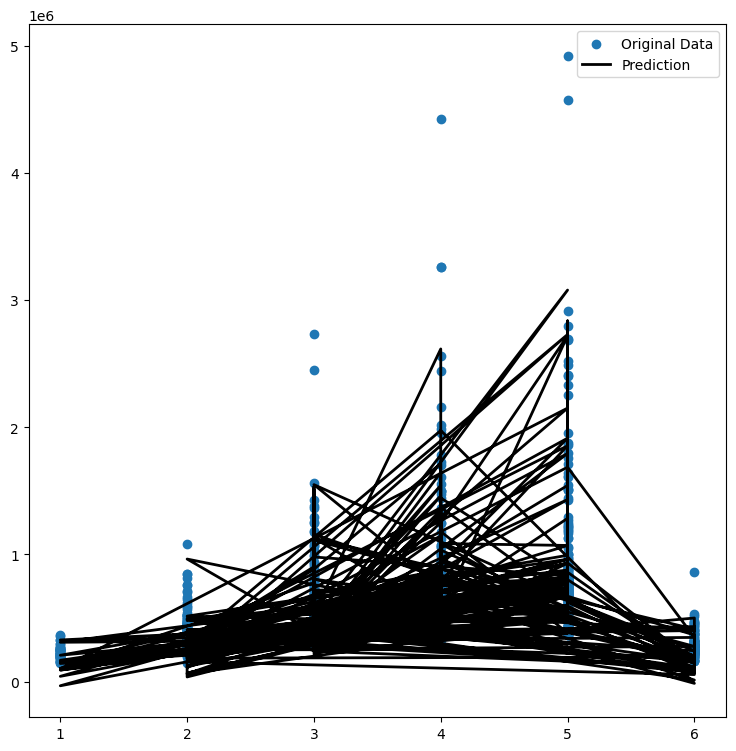

In [399]:
fig, ax = plt.subplots(figsize=(9,9))
ax.scatter(X[['Type']],y, label = "Original Data")
ax.plot(X_test[['Type']], y_pred, label = "Prediction", color='Black', lw=2)
plt.legend()

In [400]:
singleFamily = housingdf[housingdf['Type'] !=6]

In [401]:
singleFamily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333 entries, 11 to 1529
Data columns (total 74 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1333 non-null   int64  
 1   City        1333 non-null   int64  
 2   Type        1333 non-null   int64  
 3   RegionName  1333 non-null   object 
 4   Zip         1333 non-null   float64
 5   1/31/2020   1333 non-null   float64
 6   2/29/2020   1333 non-null   float64
 7   3/31/2020   1333 non-null   float64
 8   4/30/2020   1333 non-null   float64
 9   5/31/2020   1333 non-null   float64
 10  6/30/2020   1333 non-null   float64
 11  7/31/2020   1333 non-null   float64
 12  8/31/2020   1333 non-null   float64
 13  9/30/2020   1333 non-null   float64
 14  10/31/2020  1333 non-null   float64
 15  11/30/2020  1333 non-null   float64
 16  12/31/2020  1333 non-null   float64
 17  1/31/2021   1333 non-null   float64
 18  2/28/2021   1333 non-null   float64
 19  3/31/2021   1333 non-null   flo

In [402]:
X = singleFamily[['9/30/2020', 'Type', 'City', 'Zip']]
y = singleFamily['9/30/2025']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=114)
singleModel = LassoCV(cv=4, random_state=114)
singleModel.fit(X_train, y_train)

LassoCV(cv=4, random_state=114)

In [403]:
print(singleModel.alpha_)

1024913695.9662801


In [404]:
y_pred = singleModel.predict(X_test)

In [405]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE is : {mse}")
print(f"R2 score is : {r2}")

MSE is : 2377701849.134761
R2 score is : 0.984538287221425


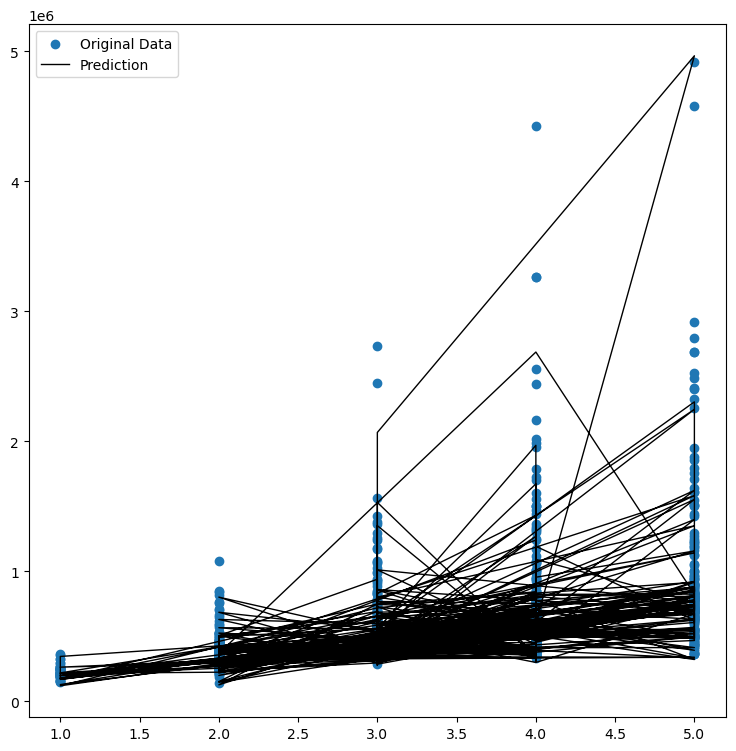

In [406]:
fig, ax = plt.subplots(figsize=(9,9))
ax.scatter(X[['Type']],y, label = "Original Data")
ax.plot(X_test[['Type']], y_pred, label = "Prediction", color='Black', lw=1)
plt.legend()

In [407]:
r = 0.06928/12
loanTerm = 30*12
housingdf['MonthlyPayment'] = round(housingdf['9/30/2025']*(((r*(1+r)**360)/(((1+r)**360)-1))),-2)

In [408]:
housingdf.head()

,RegionID,City,Type,RegionName,Zip,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,...,1/31/2025,2/28/2025,3/31/2025,4/30/2025,5/31/2025,6/30/2025,7/31/2025,8/31/2025,9/30/2025,MonthlyPayment
11,811105,1,3,1,85381.0,261905.383895,264076.390151,266536.082723,268679.787697,270149.068600,...,409849.040943,408190.372933,406139.643684,404348.460600,402335.118705,400177.502812,398231.622939,396452.261800,395251.105457,2600.0
12,811105,1,4,1,85381.0,315138.196834,316663.918944,318342.342671,320082.359098,321543.137685,...,494452.594546,493413.087436,491616.509865,489680.814994,487017.458752,483827.646123,480369.095425,476846.402919,474204.081799,3100.0
13,807394,2,3,2,85298.0,371434.904301,375624.482663,379995.456868,383474.690830,386073.701441,...,554597.586421,551809.843666,549213.514632,547603.562803,546016.921273,544415.781094,542534.215117,541267.536655,540549.994300,3600.0
14,807394,2,4,2,85298.0,405839.507415,409047.245482,412521.295728,415719.137616,417973.837622,...,640138.242590,637453.999706,635039.260700,633908.011061,633032.085125,631907.053141,630232.428005,628814.138796,627931.520330,4100.0
15,807394,2,5,2,85298.0,465747.886700,467730.858242,469497.399241,471889.944200,473903.327754,...,745809.994504,743246.676810,741269.690104,740874.860150,740826.421055,740188.599766,738494.698701,736864.854890,736082.557798,4900.0


In [605]:
from sklearn.tree import DecisionTreeClassifier
X=housingdf[['Type', 'MonthlyPayment']]
y=housingdf['City']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=114)
rnd_housing = DecisionTreeClassifier(max_depth=7, random_state=114)
rnd_housing.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=114)

Text(0.5, 1.0, 'Feature importance for the housing data set')

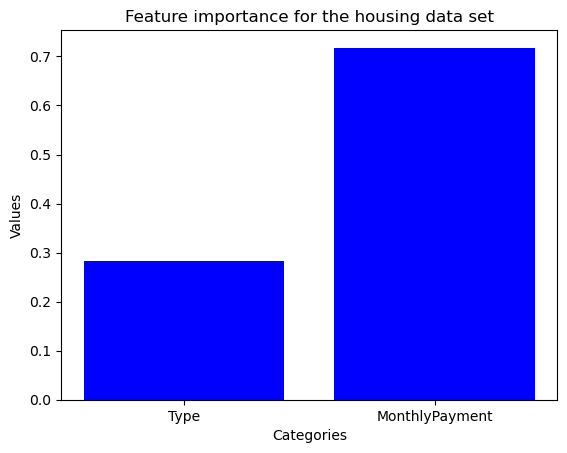

In [606]:
plt.bar(X.columns, rnd_housing.feature_importances_, color='Blue')
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Feature importance for the housing data set")

In [607]:
for score, name in zip(rnd_housing.feature_importances_, X.columns):
    print(round(score,2), name)

0.28 Type
0.72 MonthlyPayment


In [608]:
from sklearn.tree import export_graphviz
export_graphviz(
rnd_housing,
out_file="housing_tree.dot",
rounded=True,
filled=True
)

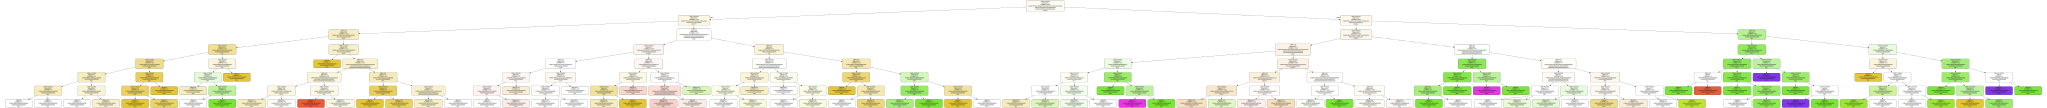

In [610]:
from graphviz import Source
Source.from_file("housing_tree.dot")

C:\Users\SuperWanker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


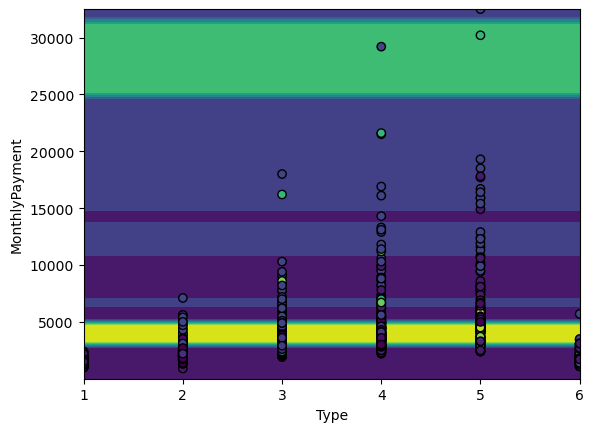

In [611]:
from sklearn.inspection import DecisionBoundaryDisplay
from mpl_toolkits.mplot3d import Axes3D
Type, MonthlyPayment = np.meshgrid(

        np.linspace(X['Type'].min(), X['Type'].max()),

        np.linspace(X['Type'].min(), X['MonthlyPayment'].max())

)
grid = np.vstack([Zip.ravel(),MonthlyPayment.ravel()]).T
y_pred = np.reshape(rnd_housing.predict(grid), Type.shape)
display = DecisionBoundaryDisplay(
    xx0=Type, xx1=MonthlyPayment, response=y_pred,
    xlabel='Type', ylabel='MonthlyPayment'
)
display.plot()
display.ax_.scatter(
    X['Type'],X['MonthlyPayment'], c=y, edgecolor='black'
)
plt.show()

In [612]:
populationdf = pd.read_csv('C:/Users/SuperWanker/Capstone files/Population Density.csv', low_memory=False)

In [613]:
populationdf.head()

,Geography Type Description,Geography Name,Sits in State,GeoID,Formatted GeoID,Population Density,Data Time Period,Geographic Vintage,Data Source,Selected Location
0,GeoID_Description,GeoID_Name,SitsinState,GeoID,GeoID_Formatted,rpopden,TimeFrame,GeoVintage,Source,Location
1,Zip Code Tabulation Area,85003,AZ,85003,"=""85003""",5459.56,2019-2023,2020,Census,"Maricopa (County, 2022)"
2,Zip Code Tabulation Area,85004,AZ,85004,"=""85004""",5446.05,2019-2023,2020,Census,"Maricopa (County, 2022)"
3,Zip Code Tabulation Area,85006,AZ,85006,"=""85006""",5566.66,2019-2023,2020,Census,"Maricopa (County, 2022)"
4,Zip Code Tabulation Area,85007,AZ,85007,"=""85007""",2944.34,2019-2023,2020,Census,"Maricopa (County, 2022)"


In [614]:
populationdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Geography Type Description  135 non-null    object
 1   Geography Name              135 non-null    object
 2   Sits in State               135 non-null    object
 3   GeoID                       135 non-null    object
 4   Formatted GeoID             135 non-null    object
 5   Population Density          135 non-null    object
 6   Data Time Period            135 non-null    object
 7   Geographic Vintage          135 non-null    object
 8   Data Source                 135 non-null    object
 9   Selected Location           135 non-null    object
dtypes: object(10)
memory usage: 10.7+ KB


In [615]:
housingdf['Zip']  = housingdf['Zip'].astype(int)

In [617]:
print(populationdf['GeoID'].unique())

['GeoID' '85003' '85004' '85006' '85007' '85008' '85009' '85012' '85013'
 '85014' '85015' '85016' '85017' '85018' '85019' '85020' '85021' '85022'
 '85023' '85024' '85026' '85027' '85028' '85029' '85031' '85032' '85033'
 '85034' '85035' '85037' '85040' '85041' '85042' '85043' '85044' '85045'
 '85048' '85050' '85051' '85053' '85054' '85083' '85085' '85086' '85087'
 '85201' '85202' '85203' '85204' '85205' '85206' '85207' '85208' '85209'
 '85210' '85212' '85213' '85215' '85224' '85225' '85226' '85233' '85234'
 '85236' '85248' '85249' '85250' '85251' '85253' '85254' '85255' '85256'
 '85257' '85258' '85259' '85260' '85262' '85263' '85264' '85266' '85268'
 '85281' '85282' '85283' '85284' '85286' '85295' '85296' '85297' '85298'
 '85301' '85302' '85303' '85304' '85305' '85306' '85307' '85308' '85309'
 '85310' '85320' '85322' '85323' '85326' '85329' '85331' '85333' '85335'
 '85337' '85338' '85339' '85340' '85343' '85345' '85351' '85353' '85354'
 '85355' '85361' '85363' '85373' '85374' '85375' '8

In [618]:
print(populationdf['Population Density'].unique())

['rpopden' '5459.56' '5446.05' '5566.66' '2944.34' '5916.50' '3557.11'
 '3939.16' '5684.62' '6489.46' '8652.43' '4496.93' '8424.61' '2537.15'
 '7229.52' '3863.92' '5765.98' '5583.43' '4672.02' '2190.39' '0.00'
 '3323.12' '2766.32' '5283.22' '7553.92' '5698.36' '9518.66' '417.41'
 '9292.28' '6486.22' '3296.45' '3995.02' '2343.95' '1950.16' '2450.07'
 '1877.45' '3370.83' '2192.98' '7156.31' '5752.07' '1186.45' '1065.02'
 '790.49' '706.97' '112.89' '5552.08' '6300.96' '4043.21' '6561.92'
 '4413.47' '3930.55' '1706.27' '4647.71' '3577.45' '5977.46' '1307.22'
 '4048.74' '200.41' '5124.59' '5776.44' '1065.79' '3922.16' '4106.00'
 '1226.18' '3346.53' '1772.58' '5533.82' '950.16' '3400.94' '511.67'
 '110.17' '4232.03' '2476.43' '1068.74' '2797.57' '89.68' '17.71' '3.11'
 '637.72' '1166.78' '5314.51' '4910.94' '5300.83' '2517.88' '3134.52'
 '4535.81' '4461.24' '3312.23' '2778.12' '7191.58' '6709.60' '5145.82'
 '5444.07' '2686.86' '4217.16' '1277.84' '3854.76' '270.04' '2137.92'
 '1.16' '1.42' '

In [621]:
print(housingdf['Zip'].unique())

[85381 85298 85296 85044 85032 85301 85008 85282 85022 85201 85224 85281
 85254 85015 85255 85209 85374 85210 85251 85027 85260 85018 85206 85016
 85048 85020 85351 85375 85014 85006 85258 85013 85250 85004 85012 85003
 85204 85019 85295 85205 85284 85383 85225 85259 85233 85286 85212 85308
 85382 85248 85266 85256 85332 85207 85142 85326 85041 85345 85033 85338
 85035 85009 85234 85339 85037 85379 85029 85323 85042 85353 85249 85051
 85283 85226 85202 85086 85017 85213 85021 85392 85303 85302 85203 85340
 85208 85043 85395 85023 85040 85335 85388 85031 85331 85050 85257 85053
 85304 85396 85085 85024 85306 85268 85028 85083 85373 85253 85215 85387
 85007 85305 85262 85378 85054 85390 85034 85363 85263 85377 85087 85297
 85310 85355 85307 85361 85354 85045 85342 85412 85228]


In [623]:
populationdf = populationdf.drop(0)

In [642]:
populationdf.head()

,Geography Type Description,Geography Name,Sits in State,GeoID,Formatted GeoID,Population Density,Data Time Period,Geographic Vintage,Data Source,Selected Location
1,Zip Code Tabulation Area,85003,AZ,85003,"=""85003""",5459.56,2019-2023,2020,Census,"Maricopa (County, 2022)"
2,Zip Code Tabulation Area,85004,AZ,85004,"=""85004""",5446.05,2019-2023,2020,Census,"Maricopa (County, 2022)"
3,Zip Code Tabulation Area,85006,AZ,85006,"=""85006""",5566.66,2019-2023,2020,Census,"Maricopa (County, 2022)"
4,Zip Code Tabulation Area,85007,AZ,85007,"=""85007""",2944.34,2019-2023,2020,Census,"Maricopa (County, 2022)"
5,Zip Code Tabulation Area,85008,AZ,85008,"=""85008""",5916.50,2019-2023,2020,Census,"Maricopa (County, 2022)"


In [643]:
populationdf['GeoID'] = populationdf['GeoID'].astype(int)
populationdf['Population Density'] = populationdf['Population Density'].astype(float)

In [648]:
populationdf = populationdf.rename(columns={'GeoID':'Zip'})
populationdf.head()

,Geography Type Description,Geography Name,Sits in State,Zip,Formatted GeoID,Population Density,Data Time Period,Geographic Vintage,Data Source,Selected Location
1,Zip Code Tabulation Area,85003,AZ,85003,"=""85003""",5459.56,2019-2023,2020,Census,"Maricopa (County, 2022)"
2,Zip Code Tabulation Area,85004,AZ,85004,"=""85004""",5446.05,2019-2023,2020,Census,"Maricopa (County, 2022)"
3,Zip Code Tabulation Area,85006,AZ,85006,"=""85006""",5566.66,2019-2023,2020,Census,"Maricopa (County, 2022)"
4,Zip Code Tabulation Area,85007,AZ,85007,"=""85007""",2944.34,2019-2023,2020,Census,"Maricopa (County, 2022)"
5,Zip Code Tabulation Area,85008,AZ,85008,"=""85008""",5916.50,2019-2023,2020,Census,"Maricopa (County, 2022)"


In [651]:
populationdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 1 to 134
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Geography Type Description  134 non-null    object 
 1   Geography Name              134 non-null    object 
 2   Sits in State               134 non-null    object 
 3   Zip                         134 non-null    int64  
 4   Formatted GeoID             134 non-null    object 
 5   Population Density          134 non-null    float64
 6   Data Time Period            134 non-null    object 
 7   Geographic Vintage          134 non-null    object 
 8   Data Source                 134 non-null    object 
 9   Selected Location           134 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 10.6+ KB


In [666]:
print(populationdf['Geographic Vintage'].unique())

['2020']


In [652]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426 entries, 11 to 1607
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RegionID        1426 non-null   int64  
 1   City            1426 non-null   int64  
 2   Type            1426 non-null   int64  
 3   RegionName      1426 non-null   object 
 4   Zip             1426 non-null   int64  
 5   1/31/2020       1426 non-null   float64
 6   2/29/2020       1426 non-null   float64
 7   3/31/2020       1426 non-null   float64
 8   4/30/2020       1426 non-null   float64
 9   5/31/2020       1426 non-null   float64
 10  6/30/2020       1426 non-null   float64
 11  7/31/2020       1426 non-null   float64
 12  8/31/2020       1426 non-null   float64
 13  9/30/2020       1426 non-null   float64
 14  10/31/2020      1426 non-null   float64
 15  11/30/2020      1426 non-null   float64
 16  12/31/2020      1426 non-null   float64
 17  1/31/2021       1426 non-null   float

In [661]:
housingjoindf = pd.merge(housingdf,populationdf, on='Zip', how='inner')

In [664]:
housingjoindf.head()

,RegionID,City,Type,RegionName,Zip,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,...,MonthlyPayment,Geography Type Description,Geography Name,Sits in State,Formatted GeoID,Population Density,Data Time Period,Geographic Vintage,Data Source,Selected Location
0,811105,1,3,1,85381,261905.383895,264076.390151,266536.082723,268679.787697,270149.068600,...,2600.0,Zip Code Tabulation Area,85381,AZ,"=""85381""",4031.47,2019-2023,2020,Census,"Maricopa (County, 2022)"
1,811105,1,4,1,85381,315138.196834,316663.918944,318342.342671,320082.359098,321543.137685,...,3100.0,Zip Code Tabulation Area,85381,AZ,"=""85381""",4031.47,2019-2023,2020,Census,"Maricopa (County, 2022)"
2,807394,2,3,2,85298,371434.904301,375624.482663,379995.456868,383474.690830,386073.701441,...,3600.0,Zip Code Tabulation Area,85298,AZ,"=""85298""",2778.12,2019-2023,2020,Census,"Maricopa (County, 2022)"
3,807394,2,4,2,85298,405839.507415,409047.245482,412521.295728,415719.137616,417973.837622,...,4100.0,Zip Code Tabulation Area,85298,AZ,"=""85298""",2778.12,2019-2023,2020,Census,"Maricopa (County, 2022)"
4,807394,2,5,2,85298,465747.886700,467730.858242,469497.399241,471889.944200,473903.327754,...,4900.0,Zip Code Tabulation Area,85298,AZ,"=""85298""",2778.12,2019-2023,2020,Census,"Maricopa (County, 2022)"


In [663]:
housingjoindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RegionID                    1307 non-null   int64  
 1   City                        1307 non-null   int64  
 2   Type                        1307 non-null   int64  
 3   RegionName                  1307 non-null   object 
 4   Zip                         1307 non-null   int64  
 5   1/31/2020                   1307 non-null   float64
 6   2/29/2020                   1307 non-null   float64
 7   3/31/2020                   1307 non-null   float64
 8   4/30/2020                   1307 non-null   float64
 9   5/31/2020                   1307 non-null   float64
 10  6/30/2020                   1307 non-null   float64
 11  7/31/2020                   1307 non-null   float64
 12  8/31/2020                   1307 non-null   float64
 13  9/30/2020                   1307 

In [667]:
incomedf = pd.read_csv('C:/Users/SuperWanker/Capstone files/Median Single Earner Income.csv', low_memory=False)

In [668]:
incomedf.head()

,Geography Type Description,Geography Name,Sits in State,GeoID,Formatted GeoID,Per Capita Income,Data Time Period,Geographic Vintage,Data Source,Selected Location
0,GeoID_Description,GeoID_Name,SitsinState,GeoID,GeoID_Formatted,apci,TimeFrame,GeoVintage,Source,Location
1,Zip Code Tabulation Area,85003,AZ,85003,"=""85003""",47337,2019-2023,2020,Census,"Maricopa (County, 2022)"
2,Zip Code Tabulation Area,85004,AZ,85004,"=""85004""",50039,2019-2023,2020,Census,"Maricopa (County, 2022)"
3,Zip Code Tabulation Area,85006,AZ,85006,"=""85006""",32803,2019-2023,2020,Census,"Maricopa (County, 2022)"
4,Zip Code Tabulation Area,85007,AZ,85007,"=""85007""",33546,2019-2023,2020,Census,"Maricopa (County, 2022)"


In [669]:
incomedf = incomedf.rename(columns={'Geography Name':'Zip'})

In [670]:
incomedf = incomedf.drop(0)

In [671]:
incomedf.head()

,Geography Type Description,Zip,Sits in State,GeoID,Formatted GeoID,Per Capita Income,Data Time Period,Geographic Vintage,Data Source,Selected Location
1,Zip Code Tabulation Area,85003,AZ,85003,"=""85003""",47337,2019-2023,2020,Census,"Maricopa (County, 2022)"
2,Zip Code Tabulation Area,85004,AZ,85004,"=""85004""",50039,2019-2023,2020,Census,"Maricopa (County, 2022)"
3,Zip Code Tabulation Area,85006,AZ,85006,"=""85006""",32803,2019-2023,2020,Census,"Maricopa (County, 2022)"
4,Zip Code Tabulation Area,85007,AZ,85007,"=""85007""",33546,2019-2023,2020,Census,"Maricopa (County, 2022)"
5,Zip Code Tabulation Area,85008,AZ,85008,"=""85008""",30285,2019-2023,2020,Census,"Maricopa (County, 2022)"


In [672]:
print(incomedf['Geographic Vintage'].unique())

['2020']


In [674]:
incomedf['Zip'] = incomedf['Zip'].astype(int)

In [675]:
housingjoindf = pd.merge(housingjoindf,incomedf, on='Zip', how='inner')

In [676]:
housingjoindf.head()

,RegionID,City,Type,RegionName,Zip,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,...,Selected Location_x,Geography Type Description_y,Sits in State_y,GeoID,Formatted GeoID_y,Per Capita Income,Data Time Period_y,Geographic Vintage_y,Data Source_y,Selected Location_y
0,811105,1,3,1,85381,261905.383895,264076.390151,266536.082723,268679.787697,270149.068600,...,"Maricopa (County, 2022)",Zip Code Tabulation Area,AZ,85381,"=""85381""",45343,2019-2023,2020,Census,"Maricopa (County, 2022)"
1,811105,1,4,1,85381,315138.196834,316663.918944,318342.342671,320082.359098,321543.137685,...,"Maricopa (County, 2022)",Zip Code Tabulation Area,AZ,85381,"=""85381""",45343,2019-2023,2020,Census,"Maricopa (County, 2022)"
2,807394,2,3,2,85298,371434.904301,375624.482663,379995.456868,383474.690830,386073.701441,...,"Maricopa (County, 2022)",Zip Code Tabulation Area,AZ,85298,"=""85298""",54093,2019-2023,2020,Census,"Maricopa (County, 2022)"
3,807394,2,4,2,85298,405839.507415,409047.245482,412521.295728,415719.137616,417973.837622,...,"Maricopa (County, 2022)",Zip Code Tabulation Area,AZ,85298,"=""85298""",54093,2019-2023,2020,Census,"Maricopa (County, 2022)"
4,807394,2,5,2,85298,465747.886700,467730.858242,469497.399241,471889.944200,473903.327754,...,"Maricopa (County, 2022)",Zip Code Tabulation Area,AZ,85298,"=""85298""",54093,2019-2023,2020,Census,"Maricopa (County, 2022)"


In [677]:
housingjoindf = housingjoindf.drop(['Geography Type Description_y', 'Selected Location_x', 'Sits in State_y', 'GeoID', 'Formatted GeoID_y', 'Geographic Vintage_y', 'Selected Location_y', 'Data Source_y'], axis=1)

In [678]:
housingjoindf.head()

,RegionID,City,Type,RegionName,Zip,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,...,Geography Type Description_x,Geography Name,Sits in State_x,Formatted GeoID_x,Population Density,Data Time Period_x,Geographic Vintage_x,Data Source_x,Per Capita Income,Data Time Period_y
0,811105,1,3,1,85381,261905.383895,264076.390151,266536.082723,268679.787697,270149.068600,...,Zip Code Tabulation Area,85381,AZ,"=""85381""",4031.47,2019-2023,2020,Census,45343,2019-2023
1,811105,1,4,1,85381,315138.196834,316663.918944,318342.342671,320082.359098,321543.137685,...,Zip Code Tabulation Area,85381,AZ,"=""85381""",4031.47,2019-2023,2020,Census,45343,2019-2023
2,807394,2,3,2,85298,371434.904301,375624.482663,379995.456868,383474.690830,386073.701441,...,Zip Code Tabulation Area,85298,AZ,"=""85298""",2778.12,2019-2023,2020,Census,54093,2019-2023
3,807394,2,4,2,85298,405839.507415,409047.245482,412521.295728,415719.137616,417973.837622,...,Zip Code Tabulation Area,85298,AZ,"=""85298""",2778.12,2019-2023,2020,Census,54093,2019-2023
4,807394,2,5,2,85298,465747.886700,467730.858242,469497.399241,471889.944200,473903.327754,...,Zip Code Tabulation Area,85298,AZ,"=""85298""",2778.12,2019-2023,2020,Census,54093,2019-2023


In [679]:
housingjoindf = housingjoindf.drop(['Geography Type Description_x', 'Geography Name', 'Sits in State_x', 'Data Time Period_x', 'Geographic Vintage_x', 'Data Source_x', 'Data Time Period_y'], axis=1)

In [680]:
housingjoindf.head()

,RegionID,City,Type,RegionName,Zip,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,...,4/30/2025,5/31/2025,6/30/2025,7/31/2025,8/31/2025,9/30/2025,MonthlyPayment,Formatted GeoID_x,Population Density,Per Capita Income
0,811105,1,3,1,85381,261905.383895,264076.390151,266536.082723,268679.787697,270149.068600,...,404348.460600,402335.118705,400177.502812,398231.622939,396452.261800,395251.105457,2600.0,"=""85381""",4031.47,45343
1,811105,1,4,1,85381,315138.196834,316663.918944,318342.342671,320082.359098,321543.137685,...,489680.814994,487017.458752,483827.646123,480369.095425,476846.402919,474204.081799,3100.0,"=""85381""",4031.47,45343
2,807394,2,3,2,85298,371434.904301,375624.482663,379995.456868,383474.690830,386073.701441,...,547603.562803,546016.921273,544415.781094,542534.215117,541267.536655,540549.994300,3600.0,"=""85298""",2778.12,54093
3,807394,2,4,2,85298,405839.507415,409047.245482,412521.295728,415719.137616,417973.837622,...,633908.011061,633032.085125,631907.053141,630232.428005,628814.138796,627931.520330,4100.0,"=""85298""",2778.12,54093
4,807394,2,5,2,85298,465747.886700,467730.858242,469497.399241,471889.944200,473903.327754,...,740874.860150,740826.421055,740188.599766,738494.698701,736864.854890,736082.557798,4900.0,"=""85298""",2778.12,54093


In [681]:
housingjoindf = housingjoindf.drop('Formatted GeoID_x', axis=1)

In [682]:
housingjoindf.head()

,RegionID,City,Type,RegionName,Zip,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,...,3/31/2025,4/30/2025,5/31/2025,6/30/2025,7/31/2025,8/31/2025,9/30/2025,MonthlyPayment,Population Density,Per Capita Income
0,811105,1,3,1,85381,261905.383895,264076.390151,266536.082723,268679.787697,270149.068600,...,406139.643684,404348.460600,402335.118705,400177.502812,398231.622939,396452.261800,395251.105457,2600.0,4031.47,45343
1,811105,1,4,1,85381,315138.196834,316663.918944,318342.342671,320082.359098,321543.137685,...,491616.509865,489680.814994,487017.458752,483827.646123,480369.095425,476846.402919,474204.081799,3100.0,4031.47,45343
2,807394,2,3,2,85298,371434.904301,375624.482663,379995.456868,383474.690830,386073.701441,...,549213.514632,547603.562803,546016.921273,544415.781094,542534.215117,541267.536655,540549.994300,3600.0,2778.12,54093
3,807394,2,4,2,85298,405839.507415,409047.245482,412521.295728,415719.137616,417973.837622,...,635039.260700,633908.011061,633032.085125,631907.053141,630232.428005,628814.138796,627931.520330,4100.0,2778.12,54093
4,807394,2,5,2,85298,465747.886700,467730.858242,469497.399241,471889.944200,473903.327754,...,741269.690104,740874.860150,740826.421055,740188.599766,738494.698701,736864.854890,736082.557798,4900.0,2778.12,54093


In [685]:
housingjoindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 77 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RegionID            1307 non-null   int64  
 1   City                1307 non-null   int64  
 2   Type                1307 non-null   int64  
 3   RegionName          1307 non-null   object 
 4   Zip                 1307 non-null   int64  
 5   1/31/2020           1307 non-null   float64
 6   2/29/2020           1307 non-null   float64
 7   3/31/2020           1307 non-null   float64
 8   4/30/2020           1307 non-null   float64
 9   5/31/2020           1307 non-null   float64
 10  6/30/2020           1307 non-null   float64
 11  7/31/2020           1307 non-null   float64
 12  8/31/2020           1307 non-null   float64
 13  9/30/2020           1307 non-null   float64
 14  10/31/2020          1307 non-null   float64
 15  11/30/2020          1307 non-null   float64
 16  12/31/

In [788]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=housingjoindf[['Population Density','Per Capita Income','Type','Zip','City']]
y=housingjoindf['9/30/2025']

In [789]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=114)

In [790]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
housingModel = LassoCV(cv=4, random_state=114)
housingModel.fit(X_train_scaled, y_train)

LassoCV(cv=4, random_state=114)

In [791]:
print(housingModel.alpha_)

1794.7800636904665


In [792]:
y_pred = housingModel.predict(X_test_scaled)

In [793]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE is : {mse}")
print(f"R2 score is : {r2}")

MSE is : 189297136290.64304
R2 score is : 0.2227498768353552


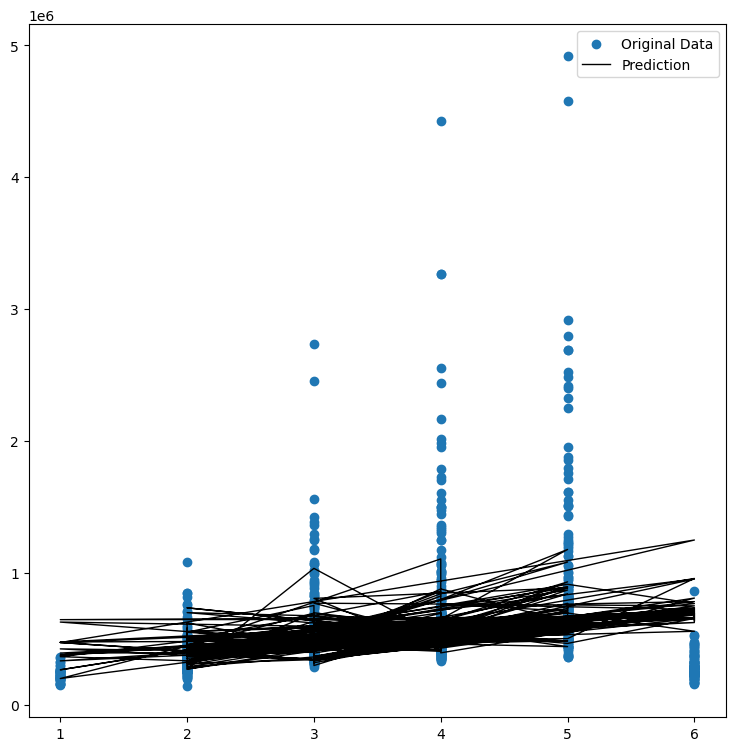

In [795]:
fig, ax = plt.subplots(figsize=(9,9))
ax.scatter(X[['Type']],y, label = "Original Data")
ax.plot(X_test[['Type']], y_pred, label = "Prediction", color='Black', lw=1)
plt.legend()

In [783]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=housingjoindf[['Population Density']]
y=housingjoindf['9/30/2025']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=114)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
populationModel = LassoCV(cv=4, random_state=114)
populationModel.fit(X_train_scaled, y_train)
print(populationModel.alpha_)

45.51193397770659


In [784]:
y_pred = populationModel.predict(X_test_scaled)

In [785]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE is : {mse}")
print(f"R2 score is : {r2}")

MSE is : 240077894961.45786
R2 score is : 0.014245132893088264


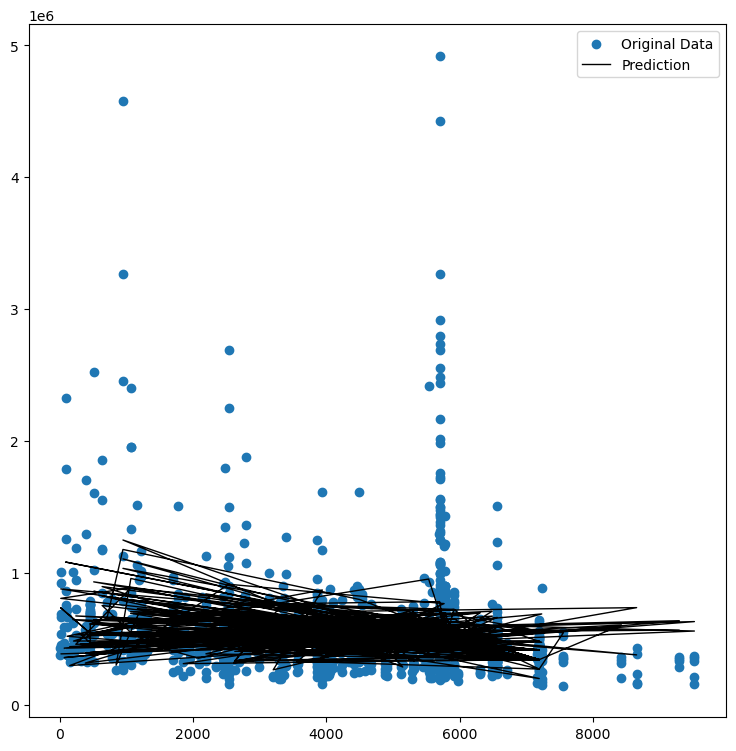

In [797]:
fig, ax = plt.subplots(figsize=(9,9))
ax.scatter(X[['Population Density']],y, label = "Original Data")
ax.plot(X_test[['Population Density']], y_pred, label = "Prediction", color='Black', lw=1)
plt.legend()